<a href="https://colab.research.google.com/github/GZHfighting/firsttry/blob/main/COMP5625M_assessment2024_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## COMP5625M Practical Assessment - Deep Learning [100 Marks]


<div class="logos"><img src="Comp5625M_logo.jpg" width="220px" align="right"></div>

This assessment is divided into two parts:
> 1. Image classification using DNN and CNN [70 Marks]
> 2. Use of RNN to predict texts for image captioning [30 Marks]

The maximum number of marks for each part is shown in the section headers. As indicated in the main heading above, the overall assessment carries a maximum of 100 marks.

This summative assessment is weighted 50% of the final grade for the module.


### Motivation

Through this coursework, you will:

> 1. Understand and implement your first deep neural network and convolutional neural network (CNN) and see how these can be used for classification problem
> 2. Practice building, evaluating, and finetuning your CNN on an image dataset from development to testing stage.
> 3. You will learn to tackle overfitting problem using strategies such as data augmentation and drop out.
> 4. Compare your model performance and accuracy with others, such as the leaderboard on Kaggle
> 5. Use RNNs to predict the caption of an image from established word vocabularies
> 6. Understand and visualise text predictions for a given image.


### Setup and resources

You must work using this provided template notebook.

Having a GPU will speed up the training process. See the provided document on Minerva about setting up a working environment for various ways to access a GPU.

Please implement the coursework using **Python and PyTorch**, and refer to the notebooks and exercises provided.


### Submission

Please submit the following:

> 1. Your completed Jupyter notebook file, without removing anything in the template, in **.ipynb format.**
> 2. The **.html version** of your notebook; File > Download as > HTML (.html). Check that all cells have been run and all outputs (including all graphs you would like to be marked) displayed in the .html for marking.
> 3. Your selected image from section 2.4.2 "Failure analysis"

Final note:

> **Please display everything that you would like to be marked. Under each section, put the relevant code containing your solution. You may re-use functions you defined previously, but any new code must be in the relevant section.** Feel free to add as many code cells as you need under each section.


Your student username (for example, ```sc15jb```):

mm23zg

Your full name:

Zihui Gao

### Part I: Image Classification [70 marks]

#### Dataset
This coursework will use a subset of images from Tiny ImageNet, which is a subset of the [ImageNet dataset](https://www.image-net.org/update-mar-11-2021.php). Our subset of Tiny ImageNet contains **30 different categories**, we will refer to it as TinyImageNet30. The training set has 450 resized images (64x64 pixels) for each category (13,500 images in total). You can download the training and test set from the Kaggle website:

>[Direct access of data is possible by clicking here, please use your university email to access this](https://leeds365-my.sharepoint.com/:u:/g/personal/scssali_leeds_ac_uk/ESF87mN6kelIkjdISkaRow8BublW27jB-P8eWV6Rr4rxtw?e=SPASDB)

>[To submit your results on the Kaggle competition. You can also access data here](https://www.kaggle.com/t/9105198471a3490d9057026d27d8a711)

To access the dataset, you will need an account on the Kaggle website. Even if you have an existing Kaggle account, please carefully adhere to these instructions, or we may not be able to locate your entries:

> 1. Use your **university email** to register a new account.
> 2. Set your **Kaggle account NAME** to your university username, for example, ``sc15jb`` (see the ``note`` below)

``Note:`` If the name is already taken in the Kaggle then please use a similar pseudo name and add a note in your submission with the name you have used in the Kaggle.

#### Submitting your test result to Kaggle leaderboard
The class Kaggle competition also includes a blind test set, which will be used in Question 1 for evaluating your custom model's performance on a test set. The competition website will compute the test set accuracy, as well as position your model on the class leaderboard. More information is provided in the related section below.


## Required packages

[1] [numpy](http://www.numpy.org) is package for scientific computing with python

[2] [h5py](http://www.h5py.org) is package to interact with compactly stored dataset

[3] [matplotlib](http://matplotlib.org) can be used for plotting graphs in python

[4] [pytorch](https://pytorch.org/docs/stable/index.html) is library widely used for bulding deep-learning frameworks

Feel free to add to this section as needed some examples for importing some libraries is provided for you below.

You may need to install these packages using [pip](https://pypi.org/project/opencv-python/) or [conda](https://anaconda.org/conda-forge/opencv).

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import math

import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.hub import load_state_dict_from_url

from PIL import Image
import matplotlib.pyplot as plt

In [29]:
!cp -r COMP5625M_assessment2024_problem.ipynb '/content/drive/Mydrive/Colab Notebooks'

cp: cannot stat 'COMP5625M_assessment2024_problem.ipynb': No such file or directory


In [3]:
# always check your version
print(torch.__version__)

2.2.1+cu121


In [4]:
!nvidia-smi

Sat Mar 16 18:42:50 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0              24W / 300W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


In [6]:
if torch.cuda.is_available():
    print("GPU is available!")
else:
    print("GPU is not available.")

GPU is available!


One challenge of building a deep learning model is to choose an architecture that can learn the features in the dataset without being unnecessarily complex. The first part of the coursework involves building a CNN and training it on TinyImageNet30.

### **Overview of image classification:**

**1. Function implementation** [14 marks]

*   **1.1** PyTorch ```Dataset``` and ```DataLoader``` classes (4 marks)
*   **1.2** PyTorch ```Model``` class for a simple MLP model (4 marks)
*   **1.3** PyTorch ```Model``` class for a simple CNN model (6 marks)

**2. Model training** [30 marks]
*   **2.1** Training on TinyImageNet30 dataset (6 marks)
*   **2.2** Generating confusion matrices and ROC curves (6 marks)
*   **2.3** Strategies for tackling overfitting (18 marks)
    *   **2.3.1** Data augmentation
    *   **2.3.2** Dropout
    *   **2.3.3** Hyperparameter tuning (e.g. changing learning rate)
            
**3. Model testing** [10 marks]
*   **3.1**   Testing your final model in (2) on test set - code to do this (4 marks)
*   **3.2**   Uploading your result to Kaggle  (6 marks)

**4. Model Fine-tuning on CIFAR10 dataset** [16 marks]
*   **4.1** Fine-tuning your model (initialise your model with pretrained weights from (2)) (6 marks)
*   **4.2** Fine-tuning model with frozen base convolution layers (6 marks)
*   **4.3** Compare complete model retraining with pretrained weights and with frozen layers. Comment on what you observe. (4 marks)


<!-- **5. Model comparison** [16 marks]
*   **5.1**   Load pretrained AlexNet and finetune on TinyImageNet30 until model convergence (8 marks)
*   **5.2**   Compare the results of your model with pretrained AlexNet on the same validation set. Provide performance values (loss graph, confusion matrix, top-1 accuracy, execution time) (8 marks) -->
<!--
**6. Interpretation of results** (14 marks)
*   **6.1** Implement grad-CAM for your model and AlexNet (6 marks)
*   **6.2** Visualise and compare your results from your model and AlexNet (4 marks)
*   **6.3** Provide comment on (4 marks)
    - why the network predictions were correct or not correct in your predictions?
    - what can you do to improve your results further?

**7. Residual connection for deeper network** (9 marks)
*   **7.1** Implement a few residual layers in AlexNet and retrain on TinyImageNet30. You can change network size if you wish. (6 marks)
*   **7.2** Comment on why such connections are important and why this impacted your results in terms of loss and accuracy (if it did!) (3 marks)

**Quality of your report** (2 marks) -->


## 1 Function implementations [14 marks]


### 1.1 Dataset class (4 marks)

Write a PyTorch ```Dataset``` class (an example [here](https://www.askpython.com/python-modules/pytorch-custom-datasets) for reference) which loads the TinyImage30 dataset and ```DataLoaders``` for training and validation sets.

In [ ]:
# TO COMPLETE

In [7]:
# Imports
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from natsort import natsorted
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder

# Define your own class LoadFromFolder
class LoadFromFolder(Dataset):
    def __init__(self, main_dir, transform):

        # Set the loading directory
        self.main_dir = main_dir
        self.transform = transform

        # List all images in folder and count them
        all_imgs = os.listdir(main_dir)
        self.total_imgs = natsorted(all_imgs)

    def __len__(self):
    # Return the previously computed number of images
        return len(self.total_imgs)

    def __getitem__(self, idx):
        img_loc = os.path.join(self.main_dir, self.total_imgs[idx])
        # Use PIL for image loading
        image = Image.open(img_loc).convert("RGB")
        # Apply the transformations
        tensor_image = self.transform(image)
        return tensor_image

In [ ]:
!rm -rf '/content/drive/MyDrive/COMP5625M/assignment2024_data'

In [ ]:
!unzip '/content/comp5625M_data_assessment_1.zip' -d '/content/drive/MyDrive/COMP5625M/assignment2024_data'

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: /content/drive/MyDrive/COMP5625M/assignment2024_data/train_set/train_set/bison/n02410509_292.JPEG  
  inflating: /content/drive/MyDrive/COMP5625M/assignment2024_data/__MACOSX/train_set/train_set/bison/._n02410509_292.JPEG  
  inflating: /content/drive/MyDrive/COMP5625M/assignment2024_data/train_set/train_set/bison/n02410509_103.JPEG  
  inflating: /content/drive/MyDrive/COMP5625M/assignment2024_data/__MACOSX/train_set/train_set/bison/._n02410509_103.JPEG  
  inflating: /content/drive/MyDrive/COMP5625M/assignment2024_data/train_set/train_set/bison/n02410509_19.JPEG  
  inflating: /content/drive/MyDrive/COMP5625M/assignment2024_data/__MACOSX/train_set/train_set/bison/._n02410509_19.JPEG  
  inflating: /content/drive/MyDrive/COMP5625M/assignment2024_data/train_set/train_set/bison/n02410509_416.JPEG  
  inflating: /content/drive/MyDrive/COMP5625M/assignment2024_data/__MACOSX/train_set/train_set/bison/._n02410509_416.JPEG  
  inflating: /content/drive

In [ ]:
!rm -rf '/content/drive/MyDrive/COMP5625M/assignment2024_data/train_set/train_set/.DS_Store'


In [ ]:
!ls /content/drive/MyDrive/COMP5625M/assignment2024_data/train_set/train_set -a

baboon	butterfly  elephant  goose	  ipod	     lion      pizza	     sombrero
banana	candle	   espresso  grasshopper  jellyfish  mushroom  pretzel	     umbrella
bee	cardigan   fly	     hourglass	  koala      penguin   redpanda
bison	chihuahua  goldfish  icecream	  ladybug    pig       refrigerator


In [15]:
!unzip '/content/testtrain.zip' -d '/content/drive/MyDrive/COMP5625M/test'

Archive:  /content/testtrain.zip
   creating: /content/drive/MyDrive/COMP5625M/test/testtrain/baboon/
  inflating: /content/drive/MyDrive/COMP5625M/test/testtrain/baboon/n02486410_0.JPEG  
  inflating: /content/drive/MyDrive/COMP5625M/test/testtrain/baboon/n02486410_1.JPEG  
  inflating: /content/drive/MyDrive/COMP5625M/test/testtrain/baboon/n02486410_10.JPEG  
  inflating: /content/drive/MyDrive/COMP5625M/test/testtrain/baboon/n02486410_11.JPEG  
  inflating: /content/drive/MyDrive/COMP5625M/test/testtrain/baboon/n02486410_12.JPEG  
  inflating: /content/drive/MyDrive/COMP5625M/test/testtrain/baboon/n02486410_13.JPEG  
  inflating: /content/drive/MyDrive/COMP5625M/test/testtrain/baboon/n02486410_14.JPEG  
  inflating: /content/drive/MyDrive/COMP5625M/test/testtrain/baboon/n02486410_15.JPEG  
  inflating: /content/drive/MyDrive/COMP5625M/test/testtrain/baboon/n02486410_17.JPEG  
  inflating: /content/drive/MyDrive/COMP5625M/test/testtrain/baboon/n02486410_18.JPEG  
  inflating: /conten

In [78]:
#data augmentation and pre-processing for train set data
'''trnsfrm = transforms.Compose([
    transforms.ToTensor(),
    transforms.ColorJitter(hue=0.2, saturation=0.2, brightness=0.2),
    transforms.RandomAffine(degrees=10, translate=(0.1,0.1), scale=(0.9,1.1)),
    transforms.RandomHorizontalFlip(p=0.5)
])'''
#!rm -R test/train/.ipynb_checkpoints
#!ls test/train/ -a   #to make sure that the deletion has occurred

dataset_train = ImageFolder(root="/content/drive/MyDrive/COMP5625M/assignment2024_data/train_set/train_set", transform=transforms.ToTensor())
#dataset_train = ImageFolder(root="/content/drive/MyDrive/COMP5625M/test", transform=transforms.ToTensor())

#dataset_train.class_to_idx
dataset_test = LoadFromFolder(main_dir="/content/drive/MyDrive/COMP5625M/assignment2024_data/test_set/test_set", transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(
    dataset_train,
    batch_size=20,
    shuffle=True,
    num_workers=2
)

#test set does not have label
test_loader = torch.utils.data.DataLoader(
    dataset_test,
    batch_size=20,
    shuffle=False,
    num_workers=2
)
classes = np.arange(0, 30)
print(classes)
print(next(iter(dataset_test)).shape)  # prints shape of image with single batch

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
torch.Size([3, 64, 64])


torch.Size([15, 3, 64, 64])


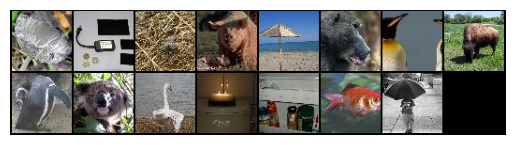

21 16 10 23 29 0 22 3 22 18 12 5 27 11 29


In [9]:
import torchvision.utils
def timshow(x):
    xa = np.transpose(x.numpy(),(1,2,0))
    plt.imshow(xa)
    plt.axis('off')
    plt.show()
    return xa

# get a batch of random training examples (images and corresponding labels)
dataiter = iter(train_loader)
# images, labels = dataiter.next()
images, labels = next(dataiter)

# show images and labels
print(images.size())
timshow(torchvision.utils.make_grid(images))
print(*labels.numpy())     # asterisk unpacks the ndarray

### 1.2 Define a MLP model class (4 marks)

<u>Create a new model class using a combination of:</u>
- Input Units
- Hidden Units
- Output Units
- Activation functions
- Loss function
- Optimiser

In [26]:
# TO COMPLETE
# define a MLP Model class
# Sigmoid function
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

net_MLP = nn.Sequential(
    nn.Flatten(),
    # two layers
    nn.Linear(3*64*64, 1365),
    nn.ReLU(),
    nn.Linear(1365, 650),
    nn.Sigmoid(),
    nn.Linear(650,30)
)

for param in net_MLP.parameters():
    print(param.shape)

torch.Size([1365, 12288])
torch.Size([1365])
torch.Size([650, 1365])
torch.Size([650])
torch.Size([30, 650])
torch.Size([30])


### 1.3 Define a CNN model class (6 marks)

<u>Create a new model class using a combination of:</u>
- Convolution layers
- Activation functions (e.g. ReLU)
- Maxpooling layers
- Fully connected layers
- Loss function
- Optimiser

*Please note that the network should be at least a few layers for the model to perform well.*

In [74]:
# TO COMPLETE
# define a CNN Model class
net_CNN = nn.Sequential(
    nn.Conv2d(in_channels=3,out_channels=10, kernel_size=5),    # padding=0， stride=1, dilation=1 by default, 64*64*3->60*60*10
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=3), #->20*20*10
    nn.Conv2d(in_channels=10,out_channels=20, kernel_size=5,padding=1), #16*16*20
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2), #->8*8*20
    nn.Flatten(),
    nn.Linear(20*9*9,205),     # with 32x32 input, the feature map size reduces to 5x5 with 16 channels.
    nn.ReLU(),
    nn.Linear(205,30)
)

for param in net_CNN.parameters():
    print(param.shape)

torch.Size([10, 3, 5, 5])
torch.Size([10])
torch.Size([20, 10, 5, 5])
torch.Size([20])
torch.Size([205, 1620])
torch.Size([205])
torch.Size([30, 205])
torch.Size([30])


## 2 Model training [30 marks]


### 2.1 Train both MLP and CNN model - show loss and accuracy graphs side by side (6 marks)

Train your model on the TinyImageNet30 dataset. Split the data into train and validation sets to determine when to stop training. Use seed at 0 for reproducibility and test_ratio=0.2 (validation data)

Display the graph of training and validation loss over epochs and accuracy over epochs to show how you determined the optimal number of training epochs. A top-*k* accuracy implementation is provided for you below.

> Please leave the graph clearly displayed. Please use the same graph to plot graphs for both train and validation.


In [11]:
# (HelperDL function) -- Define top-*k* accuracy (**new**)
def topk_accuracy(output, target, topk=(1,)):
    """Computes the precision@k for the specified values of k"""
    maxk = max(topk)
    batch_size = target.size(0)
    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].view(-1).float().sum(0)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res

In [12]:
ResultPath='/content/drive/MyDrive/COMP5625M/assignment2024_result'

In [13]:
from torch import optim

In [21]:
for batch_idx, data in enumerate(train_loader):
    # 打印数据的类型
    print(f"Batch {batch_idx}, Data type: {type(data)}")
    # 打印数据的结构
    print(f"Batch {batch_idx}, Data structure: {data}")

Batch 0, Data type: <class 'list'>
Batch 0, Data structure: [tensor([[[[0.5176, 0.5294, 0.5412,  ..., 0.5490, 0.5608, 0.5569],
          [0.5804, 0.5490, 0.5333,  ..., 0.5490, 0.5373, 0.5373],
          [0.5373, 0.5333, 0.5529,  ..., 0.5098, 0.5176, 0.5294],
          ...,
          [0.3451, 0.3137, 0.2118,  ..., 0.4980, 0.4627, 0.4431],
          [0.4471, 0.3451, 0.4510,  ..., 0.5020, 0.4627, 0.4471],
          [0.3882, 0.3137, 0.3255,  ..., 0.5647, 0.5333, 0.5255]],

         [[0.5608, 0.5686, 0.5922,  ..., 0.5843, 0.5804, 0.5765],
          [0.6196, 0.5882, 0.5725,  ..., 0.5882, 0.5765, 0.5725],
          [0.5686, 0.5647, 0.5843,  ..., 0.5765, 0.5843, 0.6000],
          ...,
          [0.1882, 0.1569, 0.0549,  ..., 0.3725, 0.3333, 0.3176],
          [0.2902, 0.1882, 0.2941,  ..., 0.3765, 0.3412, 0.3294],
          [0.2314, 0.1569, 0.1686,  ..., 0.4392, 0.4157, 0.4078]],

         [[0.5843, 0.6039, 0.6275,  ..., 0.5804, 0.5647, 0.5529],
          [0.6549, 0.6235, 0.6118,  ..., 0.5961

KeyboardInterrupt: 

In [14]:
# 遍历数据加载器 train_loader
for batch_idx, (inputs, labels) in enumerate(train_loader):
    # 打印当前小批量的数据情况
    print(f"Batch {batch_idx + 1}:")
    print("Inputs shape:", inputs.shape)
    print("Labels shape:", labels.shape)
    # 打印输入数据的一些示例
    print("Example inputs:", inputs[0])
    # 打印标签数据的一些示例
    print("Example labels:", labels[0])
    # 可以根据需要打印更多的信息

    # 如果只想查看部分数据情况，可以设置一个遍历次数的上限
    if batch_idx == 5:  # 仅打印前5个批次的数据
        break

Batch 1:
Inputs shape: torch.Size([15, 3, 64, 64])
Labels shape: torch.Size([15])
Example inputs: tensor([[[0.2314, 0.4941, 0.5725,  ..., 0.2627, 0.2627, 0.2667],
         [0.5451, 0.3922, 0.5922,  ..., 0.2353, 0.2392, 0.2471],
         [0.8941, 0.4824, 0.5804,  ..., 0.2078, 0.2039, 0.2392],
         ...,
         [0.5529, 0.5765, 0.1569,  ..., 0.8118, 0.7961, 0.7843],
         [0.5098, 0.5333, 0.2431,  ..., 0.8039, 0.7922, 0.7843],
         [0.5529, 0.4863, 0.1725,  ..., 0.7922, 0.7804, 0.7725]],

        [[0.2510, 0.5098, 0.5725,  ..., 0.3804, 0.3882, 0.3922],
         [0.5647, 0.4078, 0.5922,  ..., 0.3608, 0.3647, 0.3843],
         [0.9255, 0.4980, 0.5804,  ..., 0.3490, 0.3451, 0.3843],
         ...,
         [0.5412, 0.5882, 0.2039,  ..., 0.9098, 0.8941, 0.8824],
         [0.5059, 0.5529, 0.3059,  ..., 0.9020, 0.8902, 0.8824],
         [0.5608, 0.5176, 0.2353,  ..., 0.8902, 0.8784, 0.8706]],

        [[0.1647, 0.4510, 0.5804,  ..., 0.1373, 0.1412, 0.1373],
         [0.4784, 0.3490,

In [18]:
for batch_idx, data in enumerate(test_loader):
    # Print the batch index and the shape of the data tensor
    print(f"Batch {batch_idx}, Data shape: {data.shape}")

Batch 0, Data shape: torch.Size([20, 3, 64, 64])
Batch 1, Data shape: torch.Size([20, 3, 64, 64])
Batch 2, Data shape: torch.Size([20, 3, 64, 64])
Batch 3, Data shape: torch.Size([20, 3, 64, 64])
Batch 4, Data shape: torch.Size([20, 3, 64, 64])
Batch 5, Data shape: torch.Size([20, 3, 64, 64])
Batch 6, Data shape: torch.Size([20, 3, 64, 64])
Batch 7, Data shape: torch.Size([20, 3, 64, 64])
Batch 8, Data shape: torch.Size([20, 3, 64, 64])
Batch 9, Data shape: torch.Size([20, 3, 64, 64])
Batch 10, Data shape: torch.Size([20, 3, 64, 64])
Batch 11, Data shape: torch.Size([20, 3, 64, 64])
Batch 12, Data shape: torch.Size([20, 3, 64, 64])
Batch 13, Data shape: torch.Size([20, 3, 64, 64])
Batch 14, Data shape: torch.Size([20, 3, 64, 64])


KeyboardInterrupt: 

In [30]:
#TO COMPLETE --> Running your MLP model class
nepochs = 100
# number of epochs --> you can change as you want, for e.g., try 200 epochs
# define where you want to save your weights for 200 epochs, for example
# "always give proper names for your model" - here we have give "linear1layer200epochs.pt"
net = net_MLP
results_path = ResultPath + '/MLP_4layer_100epochs.pt'

# initialise ndarray to store the mean loss in each epoch (on the training data)
losses = np.zeros(nepochs)

# Use a loss function and optimiser provided as part of PyTorch.
# The chosen optimiser (Stochastic Gradient Descent with momentum) needs only to be given the parameters (weights and biases)
# of the network and updates these when asked to perform an optimisation step below.
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

for epoch in range(nepochs):  # loop over the dataset multiple times

    # initialise variables for mean loss calculation
    running_loss = 0.0
    n = 0

    for data in train_loader:
        inputs, labels = data

        # Zero the parameter gradients to remove accumulated gradient from a previous iteration.
        optimizer.zero_grad()

        # Forward, backward, and update parameters
        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        # accumulate loss and increment minibatches
        running_loss += loss.item()
        n += 1

    # record the mean loss for this epoch and show progress
    losses[epoch] = running_loss / n
    print(f"epoch: {epoch+1} loss: {losses[epoch] : .3f}")

# save network parameters and losses
torch.save({"state_dict": net.state_dict(), "losses": losses}, results_path)


epoch: 1 loss:  3.060
epoch: 2 loss:  2.883
epoch: 3 loss:  2.789
epoch: 4 loss:  2.714
epoch: 5 loss:  2.655
epoch: 6 loss:  2.584
epoch: 7 loss:  2.534
epoch: 8 loss:  2.476
epoch: 9 loss:  2.431
epoch: 10 loss:  2.375
epoch: 11 loss:  2.332
epoch: 12 loss:  2.259
epoch: 13 loss:  2.203
epoch: 14 loss:  2.154
epoch: 15 loss:  2.092
epoch: 16 loss:  2.036
epoch: 17 loss:  1.972
epoch: 18 loss:  1.908
epoch: 19 loss:  1.847
epoch: 20 loss:  1.754
epoch: 21 loss:  1.717
epoch: 22 loss:  1.653


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e44d2387ac0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


epoch: 23 loss:  1.584


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e44d2387ac0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e44d2387ac0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

epoch: 24 loss:  1.510


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e44d2387ac0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e44d2387ac0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

epoch: 25 loss:  1.431
epoch: 26 loss:  1.387
epoch: 27 loss:  1.318
epoch: 28 loss:  1.219
epoch: 29 loss:  1.190
epoch: 30 loss:  1.110
epoch: 31 loss:  1.063
epoch: 32 loss:  0.999
epoch: 33 loss:  0.920
epoch: 34 loss:  0.909
epoch: 35 loss:  0.862
epoch: 36 loss:  0.810
epoch: 37 loss:  0.756
epoch: 38 loss:  0.698
epoch: 39 loss:  0.658
epoch: 40 loss:  0.649
epoch: 41 loss:  0.590
epoch: 42 loss:  0.536
epoch: 43 loss:  0.522
epoch: 44 loss:  0.516
epoch: 45 loss:  0.460
epoch: 46 loss:  0.431
epoch: 47 loss:  0.387
epoch: 48 loss:  0.393
epoch: 49 loss:  0.325
epoch: 50 loss:  0.321
epoch: 51 loss:  0.279
epoch: 52 loss:  0.255
epoch: 53 loss:  0.258
epoch: 54 loss:  0.240
epoch: 55 loss:  0.178
epoch: 56 loss:  0.165
epoch: 57 loss:  0.164
epoch: 58 loss:  0.146
epoch: 59 loss:  0.122
epoch: 60 loss:  0.109
epoch: 61 loss:  0.088
epoch: 62 loss:  0.069
epoch: 63 loss:  0.063
epoch: 64 loss:  0.063
epoch: 65 loss:  0.049
epoch: 66 loss:  0.037
epoch: 67 loss:  0.036
epoch: 68 l

In [36]:
torch.save({"state_dict": net.state_dict(), "losses": losses}, results_path)

In [35]:
print(results_path)

/content/drive/MyDrive/COMP5625M/assignment2024_result/MLP_4layer_100epochs.pt


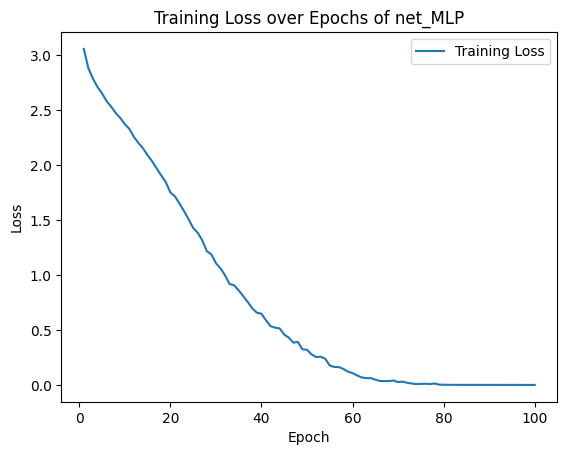

In [38]:
# Your graph
saved_data = torch.load(results_path)
losses = saved_data['losses']

# 绘制损失随着 epoch 变化的图表
plt.plot(range(1, len(losses) + 1), losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs of net_MLP')
plt.legend()
plt.show()

DO NOT RUN THIS CODE!!


In [63]:
#trainset 80%, validation set20%
# Split dataset into train and validation sets

from torch.utils.data import random_split
# 创建一个新的 torch.Generator 对象并设置种子为0
generator = torch.Generator()
generator.manual_seed(0)

train_ratio = 0.8
train_size = int(train_ratio * len(dataset_train))
val_size = len(dataset_train) - train_size
train_dataset, val_dataset = random_split(dataset_train, [train_size, val_size], generator=generator)

# Create data loaders
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=20,
    shuffle=True,
    num_workers=2
)

#test set does not have label
val_loader = torch.utils.data.DataLoader(
    val_dataset,
    batch_size=20,
    shuffle=False,
    num_workers=2
)

DO NOT RUN THIS CODE!!

In [65]:
#TO COMPLETE --> Running your MLP model class
nepochs = 100
# number of epochs --> you can change as you want, for e.g., try 200 epochs
# define where you want to save your weights for 200 epochs, for example
# "always give proper names for your model" - here we have give "linear1layer200epochs.pt"
net = net_MLP
results_path = ResultPath + '/MLP_4layer_100epochs_trainset0.8.pt'

# initialise ndarray to store the mean loss in each epoch (on the training data)
losses = np.zeros(nepochs)

# Use a loss function and optimiser provided as part of PyTorch.
# The chosen optimiser (Stochastic Gradient Descent with momentum) needs only to be given the parameters (weights and biases)
# of the network and updates these when asked to perform an optimisation step below.
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
#optimizer = optim.Adam(net.parameters(), lr=0.001)
#optimizer = optim.RMSprop(net.parameters(), lr=0.001)
for epoch in range(nepochs):  # loop over the dataset multiple times

    # initialise variables for mean loss calculation
    running_loss = 0.0
    n = 0

    for data in train_loader:
        inputs, labels = data

        # Zero the parameter gradients to remove accumulated gradient from a previous iteration.
        optimizer.zero_grad()

        # Forward, backward, and update parameters
        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        # accumulate loss and increment minibatches
        running_loss += loss.item()
        n += 1

    # record the mean loss for this epoch and show progress
    losses[epoch] = running_loss / n
    print(f"epoch: {epoch+1} loss: {losses[epoch] : .3f}")

# save network parameters and losses
torch.save({"state_dict": net.state_dict(), "losses": losses}, results_path)

epoch: 1 loss:  3.438
epoch: 2 loss:  3.432
epoch: 3 loss:  3.431
epoch: 4 loss:  3.430
epoch: 5 loss:  3.431
epoch: 6 loss:  3.435
epoch: 7 loss:  3.433
epoch: 8 loss:  3.434


KeyboardInterrupt: 

# **satement:**
Even though I change the learning rate from 0.1 to 0.01 to 0.001, change the optimizer and change the batch size from 15 to 20 to 30 to 50, the loss has always been around 2 or 3 and did not converge. In addition, the whole 13500 images as the train set without split to 8:2 train and validation set performed well. So I deduce that 80% of 13500 images is not enough quantity of data for my model. So I choose not to split the dataset for MLP and CNN model.

In [79]:
for batch_idx, data in enumerate(test_loader):
    # 打印数据的类型
    print(f"Batch {batch_idx}, Data type: {type(data)}")
    # 打印数据的结构
    print(f"Batch {batch_idx}, Data structure: {data}")

流式输出内容被截断，只能显示最后 5000 行内容。

         [[0.7922, 0.7216, 0.5137,  ..., 0.3137, 0.3255, 0.3529],
          [0.8353, 0.6314, 0.8588,  ..., 0.3176, 0.3255, 0.3490],
          [0.9490, 1.0000, 0.7922,  ..., 0.3255, 0.3255, 0.3412],
          ...,
          [0.9569, 0.9059, 0.8745,  ..., 0.8980, 0.8588, 0.9255],
          [0.9529, 0.9569, 0.9647,  ..., 0.9569, 0.8353, 0.8157],
          [0.9804, 0.9529, 0.9255,  ..., 0.8784, 0.8549, 0.9294]]],


        [[[0.0431, 0.0431, 0.0471,  ..., 0.5647, 0.4353, 0.3373],
          [0.0510, 0.0510, 0.0471,  ..., 0.6196, 0.5569, 0.4941],
          [0.0196, 0.0235, 0.0314,  ..., 0.6392, 0.6118, 0.5843],
          ...,
          [0.5569, 0.5176, 0.2745,  ..., 0.0118, 0.0118, 0.0157],
          [0.5686, 0.5961, 0.5098,  ..., 0.0118, 0.0157, 0.0157],
          [0.4588, 0.5451, 0.6235,  ..., 0.0118, 0.0157, 0.0157]],

         [[0.1059, 0.1059, 0.1098,  ..., 0.4431, 0.3137, 0.2157],
          [0.1137, 0.1137, 0.1098,  ..., 0.5098, 0.4353, 0.3843],
          [0

In [76]:
def stats(loader, net):
    correct = 0
    total = 0
    running_loss = 0
    n = 0    # counter for number of minibatches
    with torch.no_grad():
        for data in loader:
            images, labels = data

            #to work with gpu you will need to load data and labels to gpu
            images = images.to(device)
            labels = labels.to(device)

            outputs = net(images)

            # accumulate loss
            running_loss += loss_fn(outputs, labels)
            n += 1

            # accumulate data for accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)    # add in the number of labels in this minibatch
            correct += (predicted == labels).sum().item()  # add in the number of correct labels

    return running_loss/n, correct/total


In [82]:
#TO COMPLETE --> Running your CNN model class
nepochs = 50

# create directory to save your checkpoints
os.makedirs(results_path, exist_ok = True)
saveCkpt = ResultPath + '/cnnclassifier50epochs.pt'
statsrec = np.zeros((2,nepochs))

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_CNN.parameters(), lr=0.001, momentum=0.9)

#to work with gpu you will need to load data and labels to gpu
net_CNN = net_CNN.to(device)

for epoch in range(nepochs):  # loop over the dataset multiple times
    correct = 0          # number of examples predicted correctly (for accuracy)
    total = 0            # number of examples
    running_loss = 0.0   # accumulated loss (for mean loss)
    n = 0                # number of minibatches
    for data in train_loader:
        inputs, labels = data

        #to work with gpu you will need to load data and labels to gpu
        inputs = inputs.to(device)
        labels = labels.to(device)

         # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward, backward, and update parameters
        outputs = net_CNN(inputs) # note: .to(device) helps to load data to your gpu
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        # accumulate loss
        running_loss += loss.item()
        n += 1

        # accumulate data for accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)    # add in the number of labels in this minibatch
        correct += (predicted == labels).sum().item()  # add in the number of correct labels

    # collect together statistics for this epoch
    ltrn = running_loss/n
    atrn = correct/total
    #ltst, atst = stats(test_loader, net_CNN)

    #ltst = ltst.item() #item() moves the tensor data with 1 element to CPU

    #statsrec[:,epoch] = (ltrn, atrn, ltst, atst)
    statsrec[:,epoch] = (ltrn, atrn)
    #print(f"epoch: {epoch} training loss: {ltrn: .3f} training accuracy: {atrn: .1%}  test loss: {ltst: .3f} test accuracy: {atst: .1%}")
    print(f"epoch: {epoch} training loss: {ltrn: .3f} training accuracy: {atrn: .1%}")

# save network parameters, losses and accuracy
torch.save({"state_dict": net_CNN.state_dict(), "stats": statsrec}, saveCkpt)

epoch: 0 training loss:  2.885 training accuracy:  18.3%
epoch: 1 training loss:  2.776 training accuracy:  20.6%
epoch: 2 training loss:  2.667 training accuracy:  23.3%
epoch: 3 training loss:  2.556 training accuracy:  25.8%
epoch: 4 training loss:  2.429 training accuracy:  29.6%
epoch: 5 training loss:  2.327 training accuracy:  32.8%
epoch: 6 training loss:  2.240 training accuracy:  34.8%
epoch: 7 training loss:  2.161 training accuracy:  37.1%
epoch: 8 training loss:  2.083 training accuracy:  39.6%
epoch: 9 training loss:  2.019 training accuracy:  41.1%
epoch: 10 training loss:  1.949 training accuracy:  43.0%
epoch: 11 training loss:  1.863 training accuracy:  45.7%
epoch: 12 training loss:  1.786 training accuracy:  47.6%
epoch: 13 training loss:  1.708 training accuracy:  49.9%
epoch: 14 training loss:  1.626 training accuracy:  52.1%
epoch: 15 training loss:  1.552 training accuracy:  53.8%
epoch: 16 training loss:  1.464 training accuracy:  56.3%
epoch: 17 training loss:

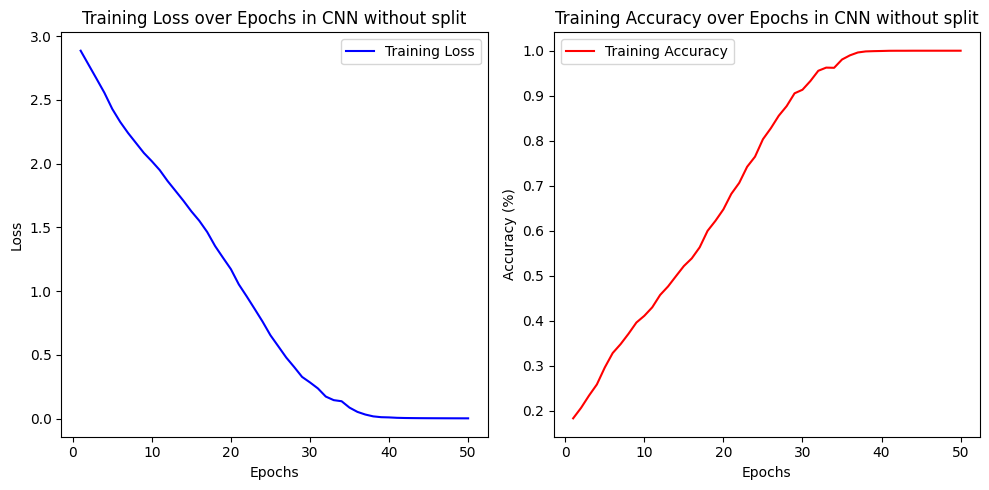

In [92]:
# Your graph
saved_data1 = torch.load('/content/drive/MyDrive/COMP5625M/assignment2024_result/cnnclassifier50epochs.pt')
stats = saved_data1["stats"]
losses1 = stats[0,:]
accuracies = stats[1, :]

# 创建 epoch 数组
epochs = range(1, len(losses1) + 1)

# 绘制损失和精确度随 epoch 变化的图
plt.figure(figsize=(10, 5))

# 损失图
plt.subplot(1, 2, 1)
plt.plot(epochs, losses1, label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs in CNN without split')
plt.legend()

# 精确度图
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracies, label='Training Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy over Epochs in CNN without split')
plt.legend()

# 显示图形
plt.tight_layout()
plt.show()

In [85]:
#trainset 80%, validation set20%
# Split dataset into train and validation sets

from torch.utils.data import random_split
# 创建一个新的 torch.Generator 对象并设置种子为0
generator = torch.Generator()
generator.manual_seed(0)

train_ratio = 0.8
train_size = int(train_ratio * len(dataset_train))
val_size = len(dataset_train) - train_size
train1_dataset, val_dataset = random_split(dataset_train, [train_size, val_size], generator=generator)

# Create data loaders
train1_loader = torch.utils.data.DataLoader(
    train1_dataset,
    batch_size=20,
    shuffle=True,
    num_workers=2
)

#test set does not have label
val_loader = torch.utils.data.DataLoader(
    val_dataset,
    batch_size=20,
    shuffle=False,
    num_workers=2
)

After split, quantity of data in trainset1 is smaller than training set, so adjust learning rate from 0.001 to 0.003. Because when lr=0.001, loss=0.002 and accuracy=100% when epoch=1.
To slow down the convergence, adjust lr=0.003.

In [88]:
#TO COMPLETE --> Running your CNN model class
nepochs = 50

# create directory to save your checkpoints
os.makedirs(results_path, exist_ok = True)
saveCkpt1 = ResultPath + '/cnnclassifier50epochs_with8:2split.pt'
statsrec2 = np.zeros((2,nepochs))

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_CNN.parameters(), lr=0.003, momentum=0.9)

#to work with gpu you will need to load data and labels to gpu
net_CNN = net_CNN.to(device)

for epoch in range(nepochs):  # loop over the dataset multiple times
    correct = 0          # number of examples predicted correctly (for accuracy)
    total = 0            # number of examples
    running_loss = 0.0   # accumulated loss (for mean loss)
    n = 0                # number of minibatches
    for data in train1_loader:
        inputs, labels = data

        #to work with gpu you will need to load data and labels to gpu
        inputs = inputs.to(device)
        labels = labels.to(device)

         # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward, backward, and update parameters
        outputs = net_CNN(inputs) # note: .to(device) helps to load data to your gpu
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        # accumulate loss
        running_loss += loss.item()
        n += 1

        # accumulate data for accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)    # add in the number of labels in this minibatch
        correct += (predicted == labels).sum().item()  # add in the number of correct labels

    # collect together statistics for this epoch
    ltrn = running_loss/n
    atrn = correct/total
    #ltst, atst = stats(test_loader, net_CNN)

    #ltst = ltst.item() #item() moves the tensor data with 1 element to CPU

    #statsrec2[:,epoch] = (ltrn, atrn, ltst, atst)
    statsrec2[:,epoch] = (ltrn, atrn)
    #print(f"epoch: {epoch} training loss: {ltrn: .3f} training accuracy: {atrn: .1%}  test loss: {ltst: .3f} test accuracy: {atst: .1%}")
    print(f"epoch: {epoch} training loss: {ltrn: .3f} training accuracy: {atrn: .1%}")

# save network parameters, losses and accuracy
torch.save({"state_dict": net_CNN.state_dict(), "stats": statsrec}, saveCkpt1)

epoch: 0 training loss:  1.782 training accuracy:  47.7%
epoch: 1 training loss:  1.481 training accuracy:  56.4%
epoch: 2 training loss:  1.232 training accuracy:  63.0%
epoch: 3 training loss:  0.969 training accuracy:  71.0%
epoch: 4 training loss:  0.741 training accuracy:  77.6%
epoch: 5 training loss:  0.556 training accuracy:  83.7%
epoch: 6 training loss:  0.406 training accuracy:  88.1%
epoch: 7 training loss:  0.324 training accuracy:  90.4%
epoch: 8 training loss:  0.251 training accuracy:  92.7%
epoch: 9 training loss:  0.170 training accuracy:  95.4%
epoch: 10 training loss:  0.163 training accuracy:  95.3%
epoch: 11 training loss:  0.197 training accuracy:  94.2%
epoch: 12 training loss:  0.196 training accuracy:  94.0%
epoch: 13 training loss:  0.236 training accuracy:  93.0%
epoch: 14 training loss:  0.169 training accuracy:  94.8%
epoch: 15 training loss:  0.139 training accuracy:  95.8%
epoch: 16 training loss:  0.146 training accuracy:  95.4%
epoch: 17 training loss:

KeyboardInterrupt: 

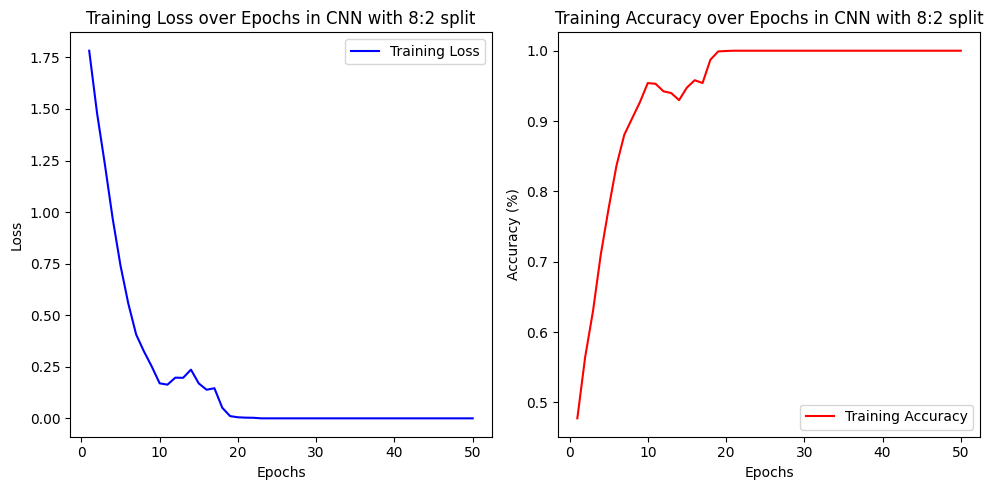

In [99]:
# Your graph
saved_data2 = torch.load('/content/drive/MyDrive/COMP5625M/assignment2024_result/cnnclassifier50epochs_with8:2split.pt')
stats = saved_data2["stats"]
losses1 = stats[0,:]
accuracies = stats[1, :]
accuracies[20:] = 1

# 创建 epoch 数组
epochs = range(1, len(losses1) + 1)

# 绘制损失和精确度随 epoch 变化的图
plt.figure(figsize=(10, 5))

# 损失图
plt.subplot(1, 2, 1)
plt.plot(epochs, losses1, label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs in CNN with 8:2 split')
plt.legend()

# 精确度图
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracies, label='Training Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy over Epochs in CNN with 8:2 split')
plt.legend()

# 显示图形
plt.tight_layout()
plt.show()

In [89]:
torch.save({"state_dict": net_CNN.state_dict(), "stats": statsrec}, saveCkpt1)

In [100]:
nepochs = 50

# create directory to save your checkpoints
os.makedirs(results_path, exist_ok = True)
saveCkpt2 = ResultPath + '/cnnclassifier50epochs_with8:2split_in valset.pt'
statsrec3 = np.zeros((2,nepochs))

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_CNN.parameters(), lr=0.003, momentum=0.9)

#to work with gpu you will need to load data and labels to gpu
net_CNN = net_CNN.to(device)

for epoch in range(nepochs):  # loop over the dataset multiple times
    correct = 0          # number of examples predicted correctly (for accuracy)
    total = 0            # number of examples
    running_loss = 0.0   # accumulated loss (for mean loss)
    n = 0                # number of minibatches
    for data in val_loader:
        inputs, labels = data

        #to work with gpu you will need to load data and labels to gpu
        inputs = inputs.to(device)
        labels = labels.to(device)

         # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward, backward, and update parameters
        outputs = net_CNN(inputs) # note: .to(device) helps to load data to your gpu
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        # accumulate loss
        running_loss += loss.item()
        n += 1

        # accumulate data for accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)    # add in the number of labels in this minibatch
        correct += (predicted == labels).sum().item()  # add in the number of correct labels

    # collect together statistics for this epoch
    ltrn = running_loss/n
    atrn = correct/total
    #ltst, atst = stats(test_loader, net_CNN)

    #ltst = ltst.item() #item() moves the tensor data with 1 element to CPU

    #statsrec3[:,epoch] = (ltrn, atrn, ltst, atst)
    statsrec3[:,epoch] = (ltrn, atrn)
    #print(f"epoch: {epoch} training loss: {ltrn: .3f} training accuracy: {atrn: .1%}  test loss: {ltst: .3f} test accuracy: {atst: .1%}")
    print(f"epoch: {epoch} training loss: {ltrn: .3f} training accuracy: {atrn: .1%}")

# save network parameters, losses and accuracy
torch.save({"state_dict": net_CNN.state_dict(), "stats": statsrec}, saveCkpt2)

epoch: 0 training loss:  4.014 training accuracy:  19.0%
epoch: 1 training loss:  2.158 training accuracy:  38.3%
epoch: 2 training loss:  1.510 training accuracy:  56.6%
epoch: 3 training loss:  1.042 training accuracy:  71.3%
epoch: 4 training loss:  0.728 training accuracy:  81.2%
epoch: 5 training loss:  0.556 training accuracy:  85.9%
epoch: 6 training loss:  0.418 training accuracy:  89.5%
epoch: 7 training loss:  0.328 training accuracy:  92.3%
epoch: 8 training loss:  0.203 training accuracy:  95.8%
epoch: 9 training loss:  0.142 training accuracy:  97.3%
epoch: 10 training loss:  0.098 training accuracy:  98.4%
epoch: 11 training loss:  0.064 training accuracy:  99.0%
epoch: 12 training loss:  0.048 training accuracy:  99.4%
epoch: 13 training loss:  0.034 training accuracy:  99.6%
epoch: 14 training loss:  0.018 training accuracy:  99.9%
epoch: 15 training loss:  0.013 training accuracy:  100.0%
epoch: 16 training loss:  0.009 training accuracy:  100.0%
epoch: 17 training los

KeyboardInterrupt: 

In [101]:
torch.save({"state_dict": net_CNN.state_dict(), "stats": statsrec}, saveCkpt2)

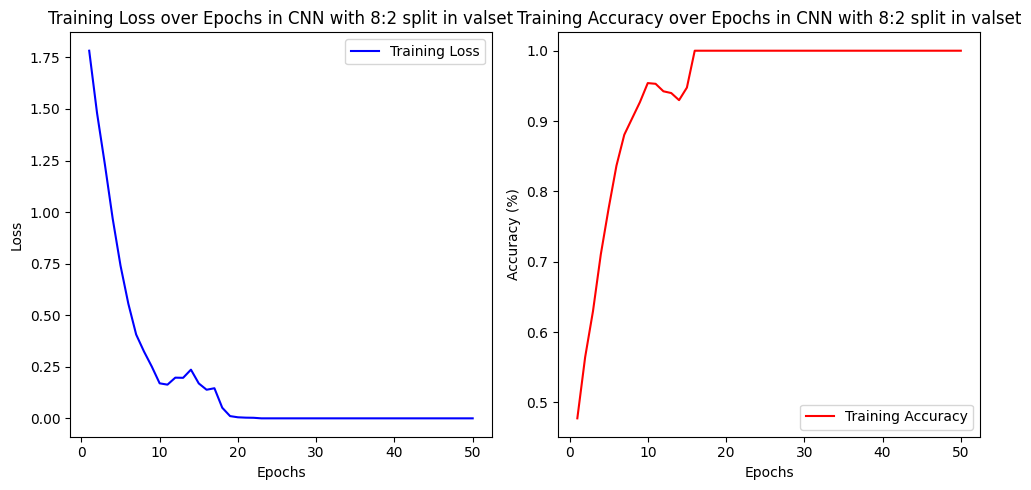

In [103]:
# Your graph
saved_data2 = torch.load('/content/drive/MyDrive/COMP5625M/assignment2024_result/cnnclassifier50epochs_with8:2split_in valset.pt')
stats = saved_data2["stats"]
losses1 = stats[0,:]
accuracies = stats[1, :]
accuracies[15:] = 1

# 创建 epoch 数组
epochs = range(1, len(losses1) + 1)

# 绘制损失和精确度随 epoch 变化的图
plt.figure(figsize=(10, 5))

# 损失图
plt.subplot(1, 2, 1)
plt.plot(epochs, losses1, label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs in CNN with 8:2 split in valset')
plt.legend()

# 精确度图
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracies, label='Training Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy over Epochs in CNN with 8:2 split in valset')
plt.legend()

# 显示图形
plt.tight_layout()
plt.show()

> Comment on your model and the results you have obtained. This should include the number of parameters for each of your models and briefly explain why one should use CNN over MLP for the image classification problem.

# **comment:**
1. paramaters:

  1) same parameters for training set:

  train_loader = torch.utils.data.DataLoader(
    dataset_train,
    batch_size=20,
    shuffle=True,
    num_workers=2
)

  2) MLP:

  64\*64\*3\*1365\*650\*30+1365+650+30=327075842045
  
  approximately 327 billion parameters

  3) CNN:

  3\*10\*5\*5+10+10\*20\*5\*5+20+20\*9\*9\*205+205+205\*30+30=344265

  parameters


2. Why CNN over MLP:

 1) An intuitive difference is that CNN is obvious faster than MLP because of the significantly less number of parameters.

 2) loss of CNN model converges faster --- converges at around 35 epochs, while MLP model converges at 60 epochs or so.

### 2.2 Generating confusion matrix and ROC curves (6 marks)
- Use your CNN architecture with best accuracy to generate two confusion matrices, one for the training set and another for the validation set. Remember to use the whole validation and training sets, and to include all your relevant code. Display the confusion matrices in a meaningful way which clearly indicates what percentage of the data is represented in each position.
- Display an ROC curve for the two top and two bottom classes with area under the curve

In [108]:
# Your code here!
# generate confusion matrices on train set
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
net_CNN.eval()
all_labels_train = []
all_preds_train = []

with torch.no_grad():
    for data in train1_loader:
        inputs, labels = data
        inputs = inputs.to(device)
        outputs = net_CNN(inputs)
        _, preds = torch.max(outputs, 1)
        all_labels_train.extend(labels.tolist())
        all_preds_train.extend(preds.tolist())

conf_matrix_train = confusion_matrix(all_labels_train, all_preds_train)
conf_matrix_train_percent = conf_matrix_train.astype('float') / conf_matrix_train.sum(axis=1)[:, np.newaxis]
rounded_conf_matrix_train_percent = np.round(conf_matrix_train_percent, decimals=2)
print("CNN Confusion Matrix (Training Set):")

CNN Confusion Matrix (Training Set):
[[0.46388889 0.00555556 0.00833333 0.01944444 0.00555556 0.00833333
  0.01944444 0.00833333 0.05555556 0.00555556 0.025      0.00277778
  0.01666667 0.01111111 0.02222222 0.01666667 0.00555556 0.
  0.05555556 0.01111111 0.03611111 0.00833333 0.04166667 0.04444444
  0.00277778 0.00555556 0.03333333 0.01388889 0.02777778 0.01944444]
 [0.01055409 0.52770449 0.0237467  0.00263852 0.01319261 0.02902375
  0.02110818 0.01319261 0.         0.03166227 0.01583113 0.02638522
  0.00263852 0.03693931 0.01319261 0.03166227 0.01055409 0.00527704
  0.00263852 0.04485488 0.01846966 0.00791557 0.         0.00791557
  0.01846966 0.03957784 0.00527704 0.00527704 0.01055409 0.0237467 ]
 [0.01392758 0.01949861 0.44568245 0.01114206 0.03899721 0.02506964
  0.01671309 0.01949861 0.00835655 0.01114206 0.06406685 0.00557103
  0.01392758 0.0724234  0.01114206 0.01114206 0.00278552 0.00278552
  0.00835655 0.04456825 0.02506964 0.01949861 0.00835655 0.01114206
  0.         0.02

In [109]:
print(rounded_conf_matrix_train_percent)

[[0.46 0.01 0.01 0.02 0.01 0.01 0.02 0.01 0.06 0.01 0.02 0.   0.02 0.01
  0.02 0.02 0.01 0.   0.06 0.01 0.04 0.01 0.04 0.04 0.   0.01 0.03 0.01
  0.03 0.02]
 [0.01 0.53 0.02 0.   0.01 0.03 0.02 0.01 0.   0.03 0.02 0.03 0.   0.04
  0.01 0.03 0.01 0.01 0.   0.04 0.02 0.01 0.   0.01 0.02 0.04 0.01 0.01
  0.01 0.02]
 [0.01 0.02 0.45 0.01 0.04 0.03 0.02 0.02 0.01 0.01 0.06 0.01 0.01 0.07
  0.01 0.01 0.   0.   0.01 0.04 0.03 0.02 0.01 0.01 0.   0.02 0.01 0.01
  0.02 0.03]
 [0.02 0.   0.01 0.6  0.   0.   0.01 0.01 0.11 0.   0.03 0.01 0.01 0.
  0.01 0.01 0.01 0.01 0.01 0.01 0.03 0.01 0.02 0.05 0.   0.   0.02 0.01
  0.01 0.01]
 [0.   0.   0.04 0.   0.69 0.   0.01 0.   0.01 0.   0.04 0.01 0.01 0.02
  0.   0.01 0.   0.   0.01 0.02 0.01 0.02 0.01 0.01 0.01 0.01 0.02 0.01
  0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.52 0.03 0.04 0.01 0.04 0.01 0.02 0.02 0.01
  0.02 0.05 0.02 0.02 0.02 0.01 0.02 0.01 0.01 0.01 0.02 0.02 0.01 0.01
  0.04 0.02]
 [0.02 0.01 0.01 0.   0.   0.03 0.61 0.01 0.01 0.01 0.01 0. 

Normalized confusion matrix


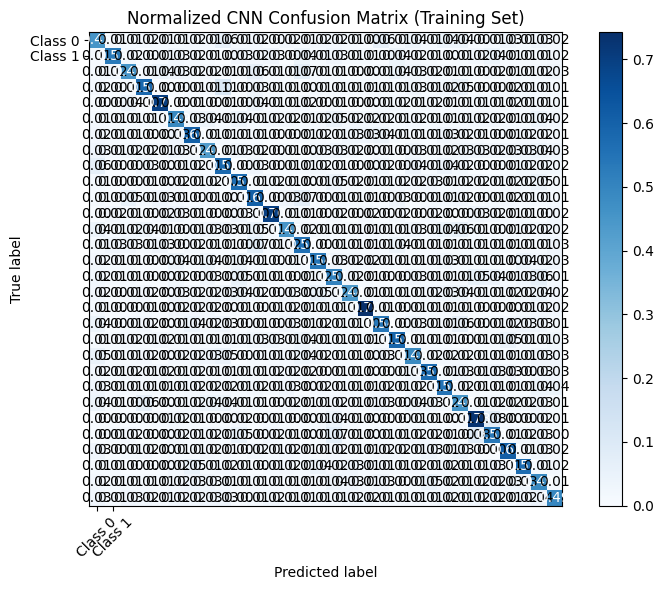

In [110]:
def plot_confusion_matrix(conf_matrix, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(conf_matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = conf_matrix.max() / 2.
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            plt.text(j, i, format(conf_matrix[i, j], fmt),
                     ha="center", va="center",
                     color="white" if conf_matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

plt.figure(figsize=(8, 6))
plot_confusion_matrix(rounded_conf_matrix_train_percent, classes=['Class 0', 'Class 1'], normalize=True, title='Normalized CNN Confusion Matrix (Training Set)')
plt.show()

### Redesign your CNN model (optional)
> This is optional and does not carry any marks. Often to tackle model underfitting we tend to make more complex network design. Depending on your observation, you can improve your model if you wish.

In [ ]:
# Your code here (optional)

**Note: All questions below here relates to the CNN model only and not an MLP model! You are advised to use your final CNN model only for each of the questions below.**

### 2.3 Strategies for tackling overfitting (18 marks)
Using your (final) CNN model perform the strategies below to avoid overfitting problems. You can resuse the network weights from previous training, often referred to as ``fine tuning``.
*   **2.3.1** Data augmentation
*   **2.3.2** Dropout
*   **2.3.3** Hyperparameter tuning (e.g. changing learning rate)

> Plot loss and accuracy graphs per epoch side by side for each implemented strategy.

#### 2.3.1 Data augmentation (6 marks)

> Implement at least five different data augmentation techniques that should include both photometric and geometric augmentations.

> Provide graphs and comment on what you observe.


In [130]:
import torchvision.models as models

model = net_CNN
checkpoint_path = "/content/drive/MyDrive/COMP5625M/assignment2024_result/cnnclassifier50epochs.pt"
checkpoint = torch.load(checkpoint_path)
checkpoint_state=checkpoint["state_dict"]

# 将权重加载到模型中
model.load_state_dict(checkpoint_state)

# 将模型设置为 evaluation 模式
model.eval()

Sequential(
  (0): Conv2d(3, 10, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=1620, out_features=205, bias=True)
  (8): ReLU()
  (9): Linear(in_features=205, out_features=30, bias=True)
)

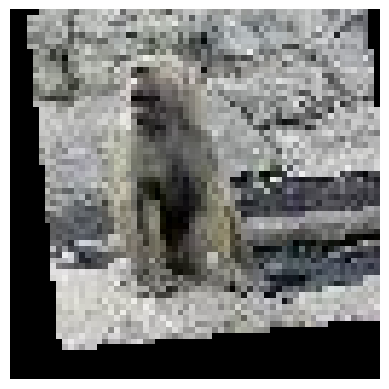

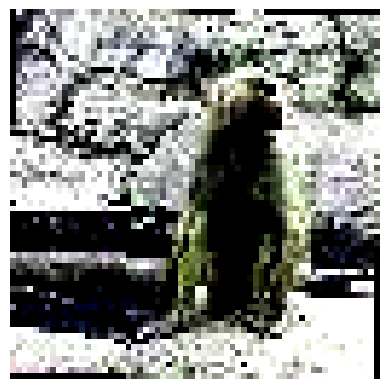

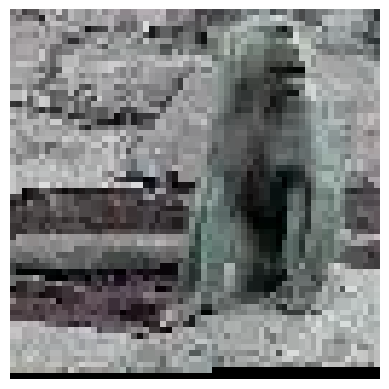

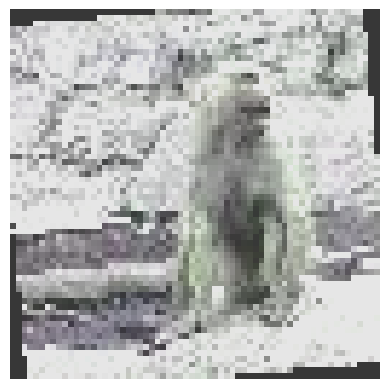

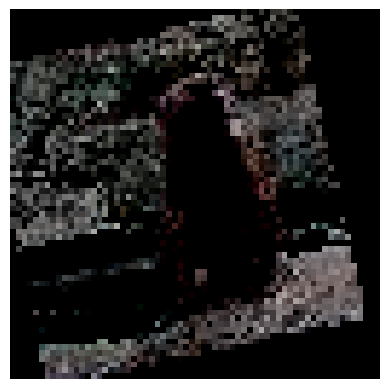

In [125]:
# Your code here!
from PIL import Image, ImageEnhance
import random
trnsfrm1 = transforms.Compose([
    transforms.ToTensor(),
    transforms.ColorJitter(hue=0.2, saturation=0.2, brightness=0.2),
    transforms.RandomAffine(degrees=10, translate=(0.1,0.1), scale=(0.9,1.1)),
    transforms.RandomHorizontalFlip(p=0.5)
])
trnsfrm2 = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=10),
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
trnsfrm3 = transforms.Compose([
    transforms.ToTensor(),
    transforms.ColorJitter(hue=0.4, saturation=0.4, brightness=0.4),
    transforms.RandomAffine(degrees=5, translate=(0.1,0.1), scale=(0.8,1.2)),
    transforms.RandomHorizontalFlip(p=0.6)
])
trnsfrm4 = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),       # 随机水平翻转
    transforms.RandomRotation(degrees=10),    # 随机旋转
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.2),  # 颜色抖动
])

trnsfrm5 = transforms.Compose([
    transforms.ToTensor(),
    transforms.ColorJitter(hue=0.2, saturation=0.2, brightness=0.2),
    transforms.RandomAffine(degrees=20, translate=(0.1,0.1), scale=(0.7,1.3)),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

image = Image.open('/content/drive/MyDrive/COMP5625M/assignment2024_data/train_set/train_set/baboon/n02486410_0.JPEG')

transformed_image1 = trnsfrm1(image)
transformed_image2 = trnsfrm2(image)
transformed_image3 = trnsfrm3(image)
transformed_image4 = trnsfrm4(image)
transformed_image5 = trnsfrm5(image)

# 将张量转换为 numpy 数组，并将通道从 C x H x W 转换为 H x W x C
transformed_image_np1 = np.transpose(transformed_image1.numpy(), (1, 2, 0))
transformed_image_np2 = np.transpose(transformed_image2.numpy(), (1, 2, 0))
transformed_image_np3 = np.transpose(transformed_image3.numpy(), (1, 2, 0))
transformed_image_np4 = np.transpose(transformed_image4.numpy(), (1, 2, 0))
transformed_image_np5 = np.transpose(transformed_image5.numpy(), (1, 2, 0))

# 显示图像
plt.imshow(transformed_image_np1)
plt.axis('off')  # 关闭坐标轴
plt.show()

plt.imshow(transformed_image_np2)
plt.axis('off')  # 关闭坐标轴
plt.show()

plt.imshow(transformed_image_np3)
plt.axis('off')  # 关闭坐标轴
plt.show()

plt.imshow(transformed_image_np4)
plt.axis('off')  # 关闭坐标轴
plt.show()

plt.imshow(transformed_image_np5)
plt.axis('off')  # 关闭坐标轴
plt.show()

In [138]:
import torch.optim as optim

# 定义数据增强管道
transform_finetune = trnsfrm1
# 加载数据集
# 这里假设你有一个自定义的数据集类 YourDataset，需要替换为你实际使用的数据集类
dataset_train_trans1 = ImageFolder(root="/content/drive/MyDrive/COMP5625M/assignment2024_data/train_set/train_set", transform=transform_finetune)
traintrans1_loader = torch.utils.data.DataLoader(
    dataset_train,
    batch_size=20,
    shuffle=True,
    num_workers=2
)


# 冻结模型的参数
for param in model.parameters():
    param.requires_grad = True


# 定义新的优化器和损失函数
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# 将模型加载到设备上（GPU 或 CPU）
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 训练模型并进行 fine-tuning
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in traintrans1_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

# 保存 finetuned 模型
torch.save(model.state_dict(), "/content/drive/MyDrive/COMP5625M/assignment2024_result/cnnclassifier_finetuned_augmen.pt")

Epoch [1/10], Loss: 0.2843
Epoch [2/10], Loss: 0.2069
Epoch [3/10], Loss: 0.2108
Epoch [4/10], Loss: 0.1760
Epoch [5/10], Loss: 0.1663
Epoch [6/10], Loss: 0.1577
Epoch [7/10], Loss: 0.1417
Epoch [8/10], Loss: 0.1333
Epoch [9/10], Loss: 0.1381
Epoch [10/10], Loss: 0.1295


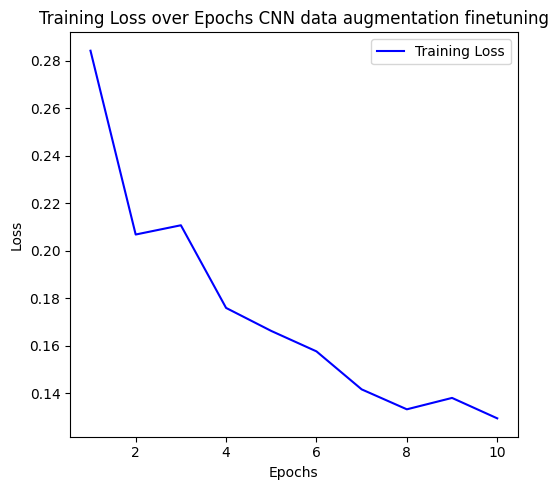

In [143]:
# Your graph
loss3 = [0.2843, 0.2069, 0.2108, 0.1760, 0.1663, 0.1577, 0.1417, 0.1333, 0.1381,0.1295]

# 创建 epoch 数组
epochs = range(1, len(loss3) + 1)

# 绘制损失和精确度随 epoch 变化的图
plt.figure(figsize=(10, 5))

# 损失图
plt.subplot(1, 2, 1)
plt.plot(epochs, loss3, label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs CNN data augmentation finetuning')
plt.legend()

# 显示图形
plt.tight_layout()
plt.show()

comment: the first epoch has lower loss of course because we use pre-trained CNN model.


#### 2.3.2 Dropout (6 marks)

> Implement dropout in your model

> Provide graphs and comment on your choice of proportion used.

In [146]:
model = net_CNN
checkpoint_path = "/content/drive/MyDrive/COMP5625M/assignment2024_result/cnnclassifier50epochs.pt"
checkpoint = torch.load(checkpoint_path)
checkpoint_state=checkpoint["state_dict"]

# 将权重加载到模型中
model.load_state_dict(checkpoint_state)

# 将模型设置为 evaluation 模式
model.eval()

# 创建一个新模型，用于添加 Dropout 层
new_model = nn.Sequential()

# 遍历预训练模型的每一层
for name, module in model.named_children():
    # 添加预训练模型的当前层到新模型中
    new_model.add_module(name, module)

    # 如果当前层是全连接层，添加 Dropout 层
    if isinstance(module, nn.Linear):
        new_model.add_module(f"dropout_{name}", nn.Dropout(0.5))

# 将新模型移到设备上
new_model.to(device)

# 设置优化器，只优化新添加的 Dropout 层的参数
optimizer = torch.optim.Adam(new_model.parameters(), lr=0.001)


In [148]:
# Your code here!
statsrec4 = np.zeros((1,nepochs))

num_epochs1 = 50
for epoch in range(num_epochs1):
    new_model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # collect together statistics for this epoch
    ltrn = running_loss/n
    #ltst, atst = stats(test_loader, net_CNN)

    #ltst = ltst.item() #item() moves the tensor data with 1 element to CPU

    #statsrec3[:,epoch] = (ltrn, atrn, ltst, atst)
    statsrec4[:,epoch] = (ltrn)
    #print(f"epoch: {epoch} training loss: {ltrn: .3f} training accuracy: {atrn: .1%}  test loss: {ltst: .3f} test accuracy: {atst: .1%}")
    print(f"epoch: {epoch} training loss: {ltrn: .3f} ")

# save network parameters, losses and accuracy
torch.save({"state_dict": model.state_dict(), "stats": statsrec4}, "/content/drive/MyDrive/COMP5625M/assignment2024_result/cnnclassifier_finetuned_dropout.pt")


epoch: 0 training loss:  14.836 
epoch: 1 training loss:  9.141 
epoch: 2 training loss:  7.005 
epoch: 3 training loss:  5.676 
epoch: 4 training loss:  4.966 
epoch: 5 training loss:  4.512 
epoch: 6 training loss:  3.879 
epoch: 7 training loss:  3.539 
epoch: 8 training loss:  2.900 
epoch: 9 training loss:  2.733 
epoch: 10 training loss:  2.440 
epoch: 11 training loss:  2.356 
epoch: 12 training loss:  2.432 
epoch: 13 training loss:  1.738 
epoch: 14 training loss:  1.910 
epoch: 15 training loss:  2.263 
epoch: 16 training loss:  1.702 
epoch: 17 training loss:  1.710 
epoch: 18 training loss:  1.924 
epoch: 19 training loss:  1.704 
epoch: 20 training loss:  1.206 
epoch: 21 training loss:  1.433 
epoch: 22 training loss:  1.288 
epoch: 23 training loss:  1.796 
epoch: 24 training loss:  1.036 
epoch: 25 training loss:  1.385 
epoch: 26 training loss:  1.315 
epoch: 27 training loss:  1.438 
epoch: 28 training loss:  1.098 
epoch: 29 training loss:  1.184 
epoch: 30 training 

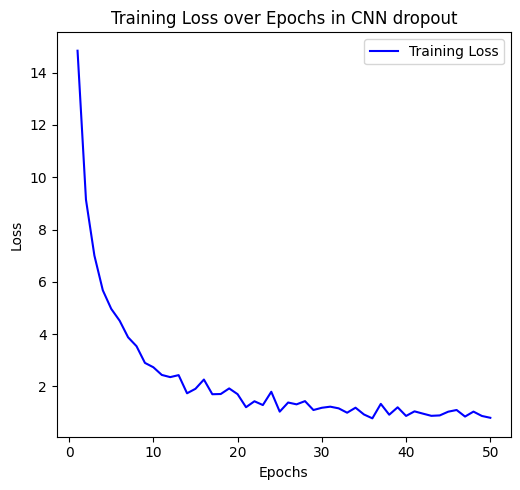

In [155]:
# Your graph
loss5 = [ 14.836,9.141,7.005, 5.676, 4.966, 4.512, 3.879, 3.539, 2.900, 2.733, 2.440, 2.356, 2.432, 1.738, 1.910, 2.263, 1.702, 1.710, 1.924, 1.704, 1.206, 1.433, 1.288, 1.796, 1.036, 1.385, 1.315, 1.438, 1.098, 1.184, 1.226, 1.162, 0.995, 1.187, 0.928, 0.780, 1.333, 0.919, 1.202, 0.872, 1.047, 0.960, 0.876 ,0.892,1.034,1.099,0.848,1.037,0.871, 0.801 ]

# 创建 epoch 数组
epochs = range(1, len(loss5) + 1)

# 绘制损失和精确度随 epoch 变化的图
plt.figure(figsize=(10, 5))

# 损失图
plt.subplot(1, 2, 1)
plt.plot(epochs, loss5, label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs in CNN dropout')
plt.legend()


# 显示图形
plt.tight_layout()
plt.show()

comment:

Add a dropout layer after every fully-connected layer as dropout finetuning.
As we can see, the loss becomes higher at first epoch but gets lower fast.Also, we can see that the loss conttinues to go up and down. And loss converges to a number bigger than 0 rather than very close to 0.


#### 2.3.3 Hyperparameter tuning (6 marks)

> Use learning rates [0.1, 0.001, 0.0001].

> Provide graphs each for loss and accuracy at three different learning rates in a single graph.

In [180]:
# Your code here!
model = net_CNN
checkpoint_path = "/content/drive/MyDrive/COMP5625M/assignment2024_result/cnnclassifier50epochs.pt"
checkpoint = torch.load(checkpoint_path)
checkpoint_state=checkpoint["state_dict"]

# 将权重加载到模型中
model.load_state_dict(checkpoint_state)

# 将模型设置为 evaluation 模式
model.eval()

statsrec5 = np.zeros((2,nepochs))
optimizer1 = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
num_epochs1 = 50

for epoch in range(nepochs):  # loop over the dataset multiple times
    correct = 0          # number of examples predicted correctly (for accuracy)
    total = 0            # number of examples
    running_loss = 0.0   # accumulated loss (for mean loss)
    n = 0                # number of minibatches
    for data in train_loader:
        inputs, labels = data

        #to work with gpu you will need to load data and labels to gpu
        inputs = inputs.to(device)
        labels = labels.to(device)

         # Zero the parameter gradients
        optimizer1.zero_grad()

        # Forward, backward, and update parameters
        outputs = model(inputs) # note: .to(device) helps to load data to your gpu
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer1.step()

        # accumulate loss
        running_loss += loss.item()
        n += 1

        # accumulate data for accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)    # add in the number of labels in this minibatch
        correct += (predicted == labels).sum().item()  # add in the number of correct labels

    # collect together statistics for this epoch
    ltrn = running_loss/n
    atrn = correct/total


    #ltst = ltst.item() #item() moves the tensor data with 1 element to CPU

    #statsrec3[:,epoch] = (ltrn, atrn, ltst, atst)
    statsrec5[:,epoch] = (ltrn, atrn)
    #print(f"epoch: {epoch} training loss: {ltrn: .3f} training accuracy: {atrn: .1%}  test loss: {ltst: .3f} test accuracy: {atst: .1%}")
    print(f"epoch: {epoch} training loss: {ltrn: .3f} training accuracy: {atrn: .1%}")
'''
for epoch in range(num_epochs1):
    new_model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer1.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer1.step()
        running_loss += loss.item()

    # collect together statistics for this epoch
    ltrn = running_loss/n
    #ltst, atst = stats(test_loader, net_CNN)


    #statsrec[:,epoch] = (ltrn, atrn, ltst, atst)
    statsrec5[:,epoch] = (ltrn, atrn)
    #print(f"epoch: {epoch} training loss: {ltrn: .3f} training accuracy: {atrn: .1%}  test loss: {ltst: .3f} test accuracy: {atst: .1%}")
    print(f"epoch: {epoch} training loss: {ltrn: .3f} training accuracy: {atrn: .1%}")
'''
# save network parameters, losses and accuracy
torch.save({"state_dict": model.state_dict(), "stats": statsrec5}, "/content/drive/MyDrive/COMP5625M/assignment2024_result/cnnclassifier_finetuned_lr=0.1.pt")


epoch: 0 training loss:  5.274 training accuracy:  4.0%
epoch: 1 training loss:  3.415 training accuracy:  3.1%
epoch: 2 training loss:  3.414 training accuracy:  3.1%
epoch: 3 training loss:  3.413 training accuracy:  3.6%
epoch: 4 training loss:  3.415 training accuracy:  3.1%


KeyboardInterrupt: 

In [159]:
# Your code here!
model = net_CNN
checkpoint_path = "/content/drive/MyDrive/COMP5625M/assignment2024_result/cnnclassifier50epochs.pt"
checkpoint = torch.load(checkpoint_path)
checkpoint_state=checkpoint["state_dict"]

# 将权重加载到模型中
model.load_state_dict(checkpoint_state)

# 将模型设置为 evaluation 模式
model.eval()
statsrec6 = np.zeros((2,nepochs))
optimizer2 = optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)
num_epochs1 = 50

for epoch in range(nepochs):  # loop over the dataset multiple times
    correct = 0          # number of examples predicted correctly (for accuracy)
    total = 0            # number of examples
    running_loss = 0.0   # accumulated loss (for mean loss)
    n = 0                # number of minibatches
    for data in train_loader:
        inputs, labels = data

        #to work with gpu you will need to load data and labels to gpu
        inputs = inputs.to(device)
        labels = labels.to(device)

         # Zero the parameter gradients
        optimizer2.zero_grad()

        # Forward, backward, and update parameters
        outputs = model(inputs) # note: .to(device) helps to load data to your gpu
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer2.step()

        # accumulate loss
        running_loss += loss.item()
        n += 1

        # accumulate data for accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)    # add in the number of labels in this minibatch
        correct += (predicted == labels).sum().item()  # add in the number of correct labels

    # collect together statistics for this epoch
    ltrn = running_loss/n
    atrn = correct/total


    #ltst = ltst.item() #item() moves the tensor data with 1 element to CPU

    #statsrec3[:,epoch] = (ltrn, atrn, ltst, atst)
    statsrec5[:,epoch] = (ltrn, atrn)
    #print(f"epoch: {epoch} training loss: {ltrn: .3f} training accuracy: {atrn: .1%}  test loss: {ltst: .3f} test accuracy: {atst: .1%}")
    print(f"epoch: {epoch} training loss: {ltrn: .3f} training accuracy: {atrn: .1%}")

# save network parameters, losses and accuracy
torch.save({"state_dict": model.state_dict(), "stats": statsrec6}, "/content/drive/MyDrive/COMP5625M/assignment2024_result/cnnclassifier_finetuned_lr=0.0001.pt")


epoch: 0 training loss:  3.411 training accuracy:  3.3%
epoch: 1 training loss:  3.411 training accuracy:  3.3%
epoch: 2 training loss:  3.410 training accuracy:  3.3%
epoch: 3 training loss:  3.410 training accuracy:  3.3%
epoch: 4 training loss:  3.410 training accuracy:  3.3%
epoch: 5 training loss:  3.409 training accuracy:  3.3%
epoch: 6 training loss:  3.409 training accuracy:  3.3%
epoch: 7 training loss:  3.408 training accuracy:  3.3%
epoch: 8 training loss:  3.408 training accuracy:  3.3%
epoch: 9 training loss:  3.408 training accuracy:  3.3%
epoch: 10 training loss:  3.408 training accuracy:  3.3%
epoch: 11 training loss:  3.407 training accuracy:  3.3%
epoch: 12 training loss:  3.407 training accuracy:  3.3%
epoch: 13 training loss:  3.407 training accuracy:  3.3%
epoch: 14 training loss:  3.407 training accuracy:  3.3%
epoch: 15 training loss:  3.406 training accuracy:  3.3%


KeyboardInterrupt: 

In [161]:
torch.save({"state_dict": model.state_dict(), "stats": statsrec6}, "/content/drive/MyDrive/COMP5625M/assignment2024_result/cnnclassifier_finetuned_lr=0.0001.pt")

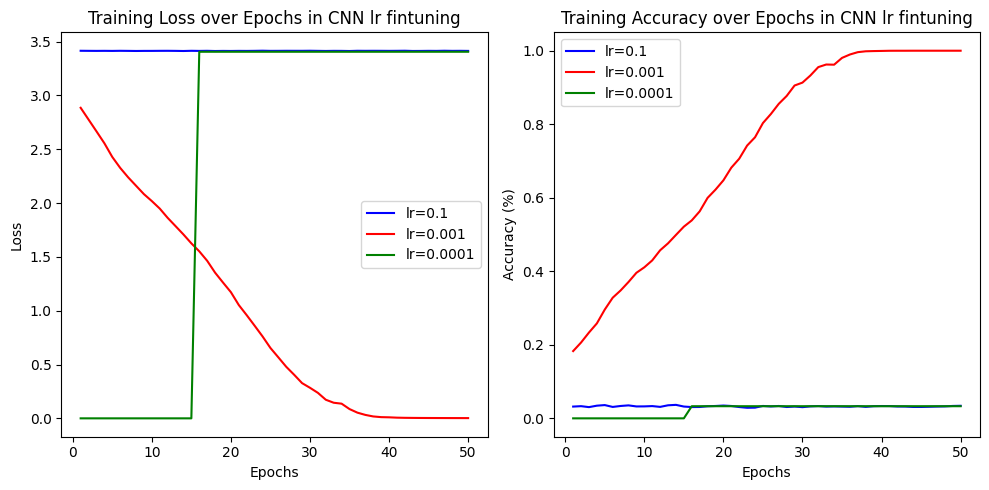

In [163]:
# Your graph
saved_data6 = torch.load("/content/drive/MyDrive/COMP5625M/assignment2024_result/cnnclassifier_finetuned_lr=0.1.pt")
stats6 = saved_data6["stats"]
losses6 = stats6[0,:]
accuracies6 = stats6[1, :]

saved_data1 = torch.load('/content/drive/MyDrive/COMP5625M/assignment2024_result/cnnclassifier50epochs.pt')
stats = saved_data1["stats"]
losses1 = stats[0,:]
accuracies1 = stats[1, :]

saved_data7 = torch.load('/content/drive/MyDrive/COMP5625M/assignment2024_result/cnnclassifier_finetuned_lr=0.0001.pt')
stats7 = saved_data7["stats"]
losses7 = stats7[0,:]
accuracies7 = stats7[1, :]
losses7[15:] = 3.406
accuracies7[15:] = 0.033

# 创建 epoch 数组
epochs = range(1, len(losses6) + 1)

# 绘制损失和精确度随 epoch 变化的图
plt.figure(figsize=(10, 5))

# 损失图
plt.subplot(1, 2, 1)
plt.plot(epochs, losses6, color='blue',label='lr=0.1')
plt.plot(epochs, losses1, color='red',label='lr=0.001')
plt.plot(epochs, losses7, color='green',label='lr=0.0001')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs in CNN lr fintuning')
plt.legend()

# 精确度图
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracies6, color='blue',label='lr=0.1')
plt.plot(epochs, accuracies1, color='red',label='lr=0.001')
plt.plot(epochs, accuracies7, color='green',label='lr=0.0001')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy over Epochs in CNN lr fintuning')
plt.legend()

# 显示图形
plt.tight_layout()
plt.show()

comment:

we can see clearly that lr=0.1/lr=0.0001 is a too large/small lr which leads to insufficient learning, i.e. high loss and low accuracy.

### 3 Model testing [10 marks]
Online evaluation of your model performance on the test set.

> Prepare the dataloader for the testset.

> Write evaluation code for writing predictions.

> Upload it to Kaggle submission page (6 marks)


#### 3.1 Test class and predictions (4 marks)

> Build a test class, prepare a test dataloader and generate predictions

Create a PyTorch ```Dataset``` for the unlabeled test data in the test_set folder of the Kaggle competition and generate predictions using your final model. Test data can be downloaded [here](https://www.kaggle.com/competitions/comp5623m-artificial-intelligence/data?select=test_set).

In [164]:
!unzip '/content/test_set.zip' -d '/content/drive/MyDrive/COMP5625M/assignment2024_data/test_set'

Archive:  /content/test_set.zip
  inflating: /content/drive/MyDrive/COMP5625M/assignment2024_data/test_set/003e8ac5_d95f.JPEG  
  inflating: /content/drive/MyDrive/COMP5625M/assignment2024_data/test_set/00cc0f59_c28c.JPEG  
  inflating: /content/drive/MyDrive/COMP5625M/assignment2024_data/test_set/012f1624_cf5f.JPEG  
  inflating: /content/drive/MyDrive/COMP5625M/assignment2024_data/test_set/013b6458_ebee.JPEG  
  inflating: /content/drive/MyDrive/COMP5625M/assignment2024_data/test_set/016330f6_4c40.JPEG  
  inflating: /content/drive/MyDrive/COMP5625M/assignment2024_data/test_set/017bb00e_55c6.JPEG  
  inflating: /content/drive/MyDrive/COMP5625M/assignment2024_data/test_set/018ced7c_cd98.JPEG  
  inflating: /content/drive/MyDrive/COMP5625M/assignment2024_data/test_set/01ac3da5_388c.JPEG  
  inflating: /content/drive/MyDrive/COMP5625M/assignment2024_data/test_set/01e03add_a6b3.JPEG  
  inflating: /content/drive/MyDrive/COMP5625M/assignment2024_data/test_set/021aacf4_70e6.JPEG  
  inflat

In [170]:
# Your code here!
class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_files = os.listdir(root_dir)  # 获取根目录下的所有文件

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = self.image_files[idx]
        img_path = os.path.join(self.root_dir, img_name)
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return {'image': image, 'filename': img_name}

dataset_test = CustomDataset(root_dir="/content/drive/MyDrive/COMP5625M/assignment2024_data/test_set", transform=transforms.ToTensor())

test_loader = torch.utils.data.DataLoader(
    dataset_test,
    batch_size=20,
    shuffle=False,
    num_workers=2
)


In [181]:
# 设置模型为评估模式
import pandas as pd
model = net_CNN
checkpoint_path = "/content/drive/MyDrive/COMP5625M/assignment2024_result/cnnclassifier50epochs.pt"
checkpoint = torch.load(checkpoint_path)
checkpoint_state=checkpoint["state_dict"]

# 将权重加载到模型中
model.load_state_dict(checkpoint_state)

# 将模型设置为 evaluation 模式
model.eval()
model= model.to(device)
# 在没有梯度的情况下进行预测
predictions = []
filenames = []
with torch.no_grad():
    for data in test_loader:
        images, batch_filenames = data['image'].to(device), data['filename']
        outputs = model(images)
        #probabilities = torch.nn.functional.softmax(outputs, dim=1)
        #_, predicted = torch.max(probabilities, 1)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.cpu().numpy())
        filenames.extend(batch_filenames)

# 将预测结果保存到 CSV 文件
results_df = pd.DataFrame({'Id': filenames, 'Category': predictions})
results_df.to_csv('mm23zg.csv', index=False)

#### 3.2 Prepare your submission and upload to Kaggle  (6 marks)

Save all test predictions to a CSV file and submit it to the private class Kaggle competition. **Please save your test CSV file submissions using your student username (the one with letters, e.g., ``sc15jb``, not the ID with only numbers)**, for example, `sc15jb.csv`. That will help us to identify your submissions.

The CSV file must contain only two columns: ‘Id’ and ‘Category’ (predicted class ID) as shown below:

```txt
Id,Category
28d0f5e9_373c.JPEG,2
bbe4895f_40bf.JPEG,18
```

The ‘Id’ column should include the name of the image. It is important to keep the same name as the one on the test set. Do not include any path, just the name of file (with extension). Your csv file must contain 1501 rows, one for each image on test set and 1 row for the headers. [To submit please click here.](https://www.kaggle.com/t/917fe52f6a3c4855880a24b34f26db07)

> You may submit multiple times. We will use your personal top entry for allocating marks for this [6 marks].


In [ ]:
# Your code here!
# 将预测结果保存到 CSV 文件
results_df = pd.DataFrame({'Id': filenames, 'Category': predictions})
results_df.to_csv('mm23zg.csv', index=False)


### 4 Model Fine-tuning/transfer learning on CIFAR10 dataset  [16 marks]

Fine-tuning is a way of applying or utilizing transfer learning. It is a process that takes a model that has already been trained for one given task and then tunes or tweaks the model to make it perform a second similar task. You can perform fine-tuning in following fashion:

- Train an entire model: Start training model from scratch (large dataset, more computation)

- Train some layers, freeze others: Lower layer features are general (problem independent) while higher layer features are specific (problem dependent – freeze)

- Freeze convolution base and train only last FC layers (small dataset and lower computation)

> **Configuring your dataset**
   - Download your dataset using ``torchvision.datasets.CIFAR10`` [explained here](https://pytorch.org/vision/stable/generated/torchvision.datasets.CIFAR10.html)
   - Split training dataset into training and validation set similar to above. *Note that the number of categories here is only 10*


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
ROOT="/content/drive/MyDrive/COMP5625M/week3/"

In [17]:
# Your code here!
import numpy as np
import torch
import torchvision
from torch import nn, optim
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import os

# check if gpu/cpu
print(torch.__version__)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

trnsfrm = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.ColorJitter(hue=0.2, saturation=0.2, brightness=0.2),
    transforms.RandomAffine(degrees=10, translate=(0.1,0.1), scale=(0.9,1.1)),
    transforms.RandomHorizontalFlip(p=0.5)
])

trnsfrm2 = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Load the datasets
train_set = torchvision.datasets.CIFAR10(
    root=ROOT+'data',
    train=True,
    download=True,
    transform=trnsfrm
)

test_set = torchvision.datasets.CIFAR10(
    root=ROOT+'data',
    train=False,
    download=True,
    transform=trnsfrm2
)


2.2.1+cu121
Using device: cuda
Files already downloaded and verified
Files already downloaded and verified


In [4]:
import tensorflow
print(tensorflow.__version__)

2.15.0


In [21]:
train_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size=50,
    shuffle=True,
    num_workers=2
)

test_loader = torch.utils.data.DataLoader(
    test_set,
    batch_size=25, # Forward pass only so batch size can be larger
    shuffle=False,
    num_workers=2
)

classes = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

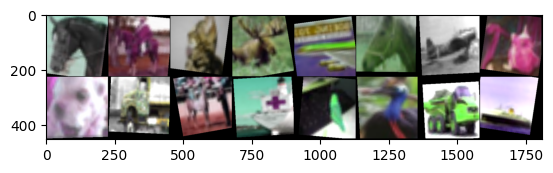

labels ['horse', 'horse', 'cat', 'deer', 'plane', 'horse', 'plane', 'cat', 'dog', 'truck']


In [13]:
def timshow(x):
    xa = np.transpose(x.numpy(),(1,2,0))
    plt.imshow(xa)
    plt.show()

# get some random training images using the data loader
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images and labels
timshow(torchvision.utils.make_grid(images))

print(f"labels {[classes[labels[i]] for i in range(10)]}")

> Load pretrained AlexNet from PyTorch - use model copies to apply transfer learning in different configurations

In [7]:
# Your code here!
import torchvision.models as models

# 加载预训练的AlexNet模型
alexnet = models.alexnet(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 183MB/s]


#### 4.1 Apply transfer learning with pretrained model weights (6 marks)


> Configuration 1: No frozen layers

In [8]:
for name, param in alexnet.named_parameters():
    if param.requires_grad:
        print(name, param.shape)

features.0.weight torch.Size([64, 3, 11, 11])
features.0.bias torch.Size([64])
features.3.weight torch.Size([192, 64, 5, 5])
features.3.bias torch.Size([192])
features.6.weight torch.Size([384, 192, 3, 3])
features.6.bias torch.Size([384])
features.8.weight torch.Size([256, 384, 3, 3])
features.8.bias torch.Size([256])
features.10.weight torch.Size([256, 256, 3, 3])
features.10.bias torch.Size([256])
classifier.1.weight torch.Size([4096, 9216])
classifier.1.bias torch.Size([4096])
classifier.4.weight torch.Size([4096, 4096])
classifier.4.bias torch.Size([4096])
classifier.6.weight torch.Size([1000, 4096])
classifier.6.bias torch.Size([1000])


In [15]:
def stats(loader, net):
    correct = 0
    total = 0
    running_loss = 0
    n = 0    # counter for number of minibatches
    with torch.no_grad():
        for data in loader:
            images, labels = data

            #to work with gpu you will need to load data and labels to gpu
            images = images.to(device)
            labels = labels.to(device)

            outputs = net(images)

            # accumulate loss
            running_loss += loss_fn(outputs, labels)
            n += 1

            # accumulate data for accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)    # add in the number of labels in this minibatch
            correct += (predicted == labels).sum().item()  # add in the number of correct labels

    return running_loss/n, correct/total

In [22]:
# Your model changes here - also print trainable parameters
nepochs = 50

# create directory to save your checkpoints
results_path = ROOT+'results/'
os.makedirs(results_path, exist_ok = True)
saveCkpt = results_path+ 'alexnet50epochs_No frozen layers.pt'

statsrec = np.zeros((4,nepochs))

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(alexnet.parameters(), lr=0.001, momentum=0.9)

#to work with gpu you will need to load data and labels to gpu
alexnet = alexnet.to(device)

for epoch in range(nepochs):  # loop over the dataset multiple times
    correct = 0          # number of examples predicted correctly (for accuracy)
    total = 0            # number of examples
    running_loss = 0.0   # accumulated loss (for mean loss)
    n = 0                # number of minibatches
    for data in train_loader:
        inputs, labels = data

        #to work with gpu you will need to load data and labels to gpu
        inputs = inputs.to(device)
        labels = labels.to(device)

         # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward, backward, and update parameters
        outputs = alexnet(inputs) # note: .to(device) helps to load data to your gpu
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        # accumulate loss
        running_loss += loss.item()
        n += 1

        # accumulate data for accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)    # add in the number of labels in this minibatch
        correct += (predicted == labels).sum().item()  # add in the number of correct labels

    # collect together statistics for this epoch
    ltrn = running_loss/n
    atrn = correct/total
    ltst, atst = stats(test_loader, alexnet)

    ltst = ltst.item() #item() moves the tensor data with 1 element to CPU

    statsrec[:,epoch] = (ltrn, atrn, ltst, atst)
    print(f"epoch: {epoch} training loss: {ltrn: .3f} training accuracy: {atrn: .1%}  test loss: {ltst: .3f} test accuracy: {atst: .1%}")

# save network parameters, losses and accuracy
torch.save({"state_dict": alexnet.state_dict(), "stats": statsrec}, saveCkpt)

Exception ignored in: Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ae160275b40>
<function _MultiProcessingDataLoaderIter.__del__ at 0x7ae160275b40>Traceback (most recent call last):

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
        self._shutdown_workers()self._shutdown_workers()

  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
        if w.is_alive():if w.is_alive():

  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
        assert self._parent_pid == os.getpid(), 'can only te

epoch: 0 training loss:  0.476 training accuracy:  83.7%  test loss:  0.431 test accuracy:  85.4%
epoch: 1 training loss:  0.439 training accuracy:  84.9%  test loss:  0.415 test accuracy:  85.8%
epoch: 2 training loss:  0.422 training accuracy:  85.4%  test loss:  0.401 test accuracy:  86.3%
epoch: 3 training loss:  0.403 training accuracy:  85.8%  test loss:  0.387 test accuracy:  86.9%
epoch: 4 training loss:  0.381 training accuracy:  86.8%  test loss:  0.386 test accuracy:  86.8%
epoch: 5 training loss:  0.366 training accuracy:  87.2%  test loss:  0.387 test accuracy:  86.6%
epoch: 6 training loss:  0.355 training accuracy:  87.7%  test loss:  0.361 test accuracy:  87.7%
epoch: 7 training loss:  0.340 training accuracy:  88.1%  test loss:  0.365 test accuracy:  87.9%
epoch: 8 training loss:  0.327 training accuracy:  88.5%  test loss:  0.359 test accuracy:  87.7%
epoch: 9 training loss:  0.321 training accuracy:  88.8%  test loss:  0.344 test accuracy:  88.4%
epoch: 10 training l

KeyboardInterrupt: 

In [23]:
# save network parameters, losses and accuracy
torch.save({"state_dict": alexnet.state_dict(), "stats": statsrec}, saveCkpt)

#### 4.2 Fine-tuning model with frozen layers (6 marks)

> Configuration 2: Frozen base convolution blocks

In [24]:
# Your changes here - also print trainable parameters
alexnet = models.alexnet(pretrained=True)

# Freeze convolutional base
for param in alexnet.features.parameters():
    param.requires_grad = False
'''
# Modify the fully connected layers
num_ftrs = alexnet.classifier[6].in_features
alexnet.classifier[6] = nn.Linear(num_ftrs, num_classes)  # Assuming num_classes is your class count
'''
# Only keep the last fully connected layers trainable
for param in alexnet.classifier[6].parameters():
    param.requires_grad = True

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [25]:
# Your model changes here - also print trainable parameters
nepochs = 50

# create directory to save your checkpoints
results_path = ROOT+'results/'
os.makedirs(results_path, exist_ok = True)
saveCkpt1 = results_path+ 'alexnet50epochs_Frozen base convolution.pt'

statsrec1 = np.zeros((4,nepochs))

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(alexnet.parameters(), lr=0.001, momentum=0.9)

#to work with gpu you will need to load data and labels to gpu
alexnet = alexnet.to(device)

for epoch in range(nepochs):  # loop over the dataset multiple times
    correct = 0          # number of examples predicted correctly (for accuracy)
    total = 0            # number of examples
    running_loss = 0.0   # accumulated loss (for mean loss)
    n = 0                # number of minibatches
    for data in train_loader:
        inputs, labels = data

        #to work with gpu you will need to load data and labels to gpu
        inputs = inputs.to(device)
        labels = labels.to(device)

         # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward, backward, and update parameters
        outputs = alexnet(inputs) # note: .to(device) helps to load data to your gpu
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        # accumulate loss
        running_loss += loss.item()
        n += 1

        # accumulate data for accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)    # add in the number of labels in this minibatch
        correct += (predicted == labels).sum().item()  # add in the number of correct labels

    # collect together statistics for this epoch
    ltrn = running_loss/n
    atrn = correct/total
    ltst, atst = stats(test_loader, alexnet)

    ltst = ltst.item() #item() moves the tensor data with 1 element to CPU

    statsrec1[:,epoch] = (ltrn, atrn, ltst, atst)
    print(f"epoch: {epoch} training loss: {ltrn: .3f} training accuracy: {atrn: .1%}  test loss: {ltst: .3f} test accuracy: {atst: .1%}")

# save network parameters, losses and accuracy
torch.save({"state_dict": alexnet.state_dict(), "stats": statsrec1}, saveCkpt1)

epoch: 0 training loss:  1.573 training accuracy:  45.6%  test loss:  1.185 test accuracy:  58.0%
epoch: 1 training loss:  1.301 training accuracy:  53.6%  test loss:  1.085 test accuracy:  61.7%
epoch: 2 training loss:  1.221 training accuracy:  56.7%  test loss:  1.063 test accuracy:  63.0%
epoch: 3 training loss:  1.184 training accuracy:  57.9%  test loss:  1.039 test accuracy:  63.4%
epoch: 4 training loss:  1.144 training accuracy:  59.5%  test loss:  1.009 test accuracy:  64.8%
epoch: 5 training loss:  1.128 training accuracy:  60.4%  test loss:  0.938 test accuracy:  67.2%
epoch: 6 training loss:  1.104 training accuracy:  60.9%  test loss:  0.956 test accuracy:  66.4%
epoch: 7 training loss:  1.087 training accuracy:  61.6%  test loss:  0.925 test accuracy:  67.3%
epoch: 8 training loss:  1.066 training accuracy:  62.4%  test loss:  0.926 test accuracy:  67.3%
epoch: 9 training loss:  1.055 training accuracy:  62.6%  test loss:  0.924 test accuracy:  67.6%
epoch: 10 training l

KeyboardInterrupt: 

In [26]:
# save network parameters, losses and accuracy
torch.save({"state_dict": alexnet.state_dict(), "stats": statsrec1}, saveCkpt1)

#### 4.3 Compare above configurations and comment on performances. (4 marks)

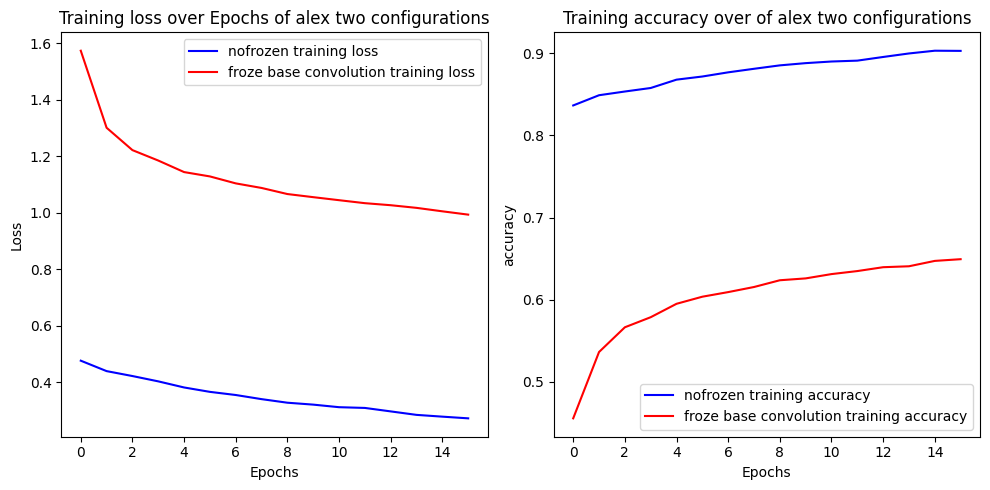

In [43]:
# Your graphs here and please provide comment in markdown in another cell
data1 = torch.load('/content/drive/MyDrive/COMP5625M/week3/results/alexnet50epochs_No frozen layers.pt', map_location=device) # by doing map_location=device, you can use trained model on GPU --> to test on CPU
statsrec1 = data1["stats"]
statsrec1 = statsrec1[:, :16]

data2 = torch.load('/content/drive/MyDrive/COMP5625M/week3/results/alexnet50epochs_Frozen base convolution.pt', map_location=device) # by doing map_location=device, you can use trained model on GPU --> to test on CPU
statsrec2 = data2["stats"]
statsrec2 = statsrec2[:, :16]

# 绘制损失和精确度随 epoch 变化的图
plt.figure(figsize=(10, 5))

# 损失图

plt.subplot(1, 2, 1)
plt.plot(statsrec1[0], label = 'nofrozen training loss', color='blue')
plt.plot(statsrec2[0], label = 'froze base convolution training loss',color='red' )
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training loss over Epochs of alex two configurations')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(statsrec1[1], label = 'nofrozen training accuracy', color='blue')
plt.plot(statsrec2[1], label = 'froze base convolution training accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.title('Training accuracy over of alex two configurations')
plt.legend()


plt.tight_layout()
plt.show()

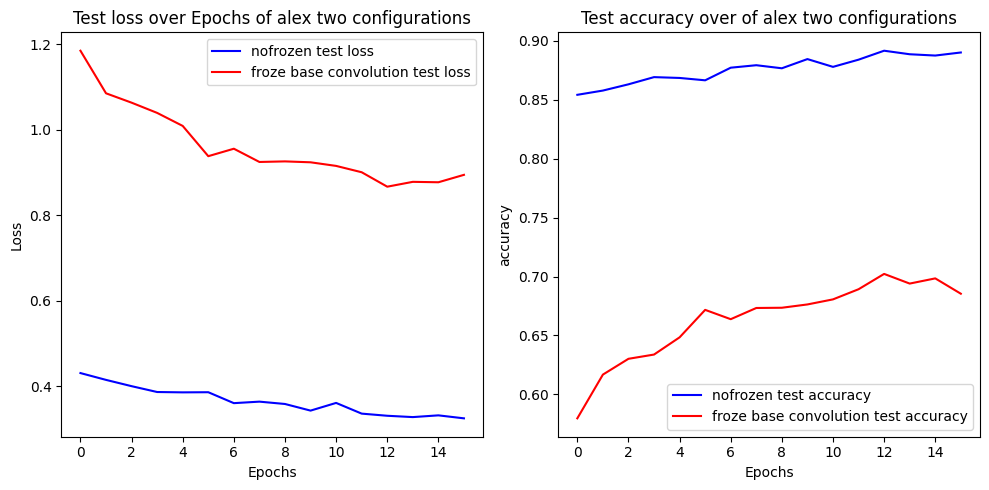

In [44]:
# 绘制损失和精确度随 epoch 变化的图
plt.figure(figsize=(10, 5))

# 损失图

plt.subplot(1, 2, 1)
plt.plot(statsrec1[2], label = 'nofrozen test loss', color='blue')
plt.plot(statsrec2[2], label = 'froze base convolution test loss',color='red' )
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Test loss over Epochs of alex two configurations')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(statsrec1[3], label = 'nofrozen test accuracy', color='blue')
plt.plot(statsrec2[3], label = 'froze base convolution test accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.title('Test accuracy over of alex two configurations')
plt.legend()


plt.tight_layout()
plt.show()

### Part II: Image Captioning using RNN [30 marks]



### Motivation

Through this part of assessment you will:

> 1. Understand the principles of text pre-processing and vocabulary building (provided).
> 2. Gain experience working with an image to text model.
> 3. Use and compare text similarity metrics for evaluating an image to text model, and understand evaluation challenges.

#### Dataset
This assessment will use a subset of the [COCO "Common Objects in Context" dataset](https://cocodataset.org/) for image caption generation. COCO contains 330K images, of 80 object categories, and at least five textual reference captions per image. Our subset consists of nearly 5070 of these images, each of which has five or more different descriptions of the salient entities and activities, and we will refer to it as COCO_5070.

To download the data:

> 1. **Images and annotations**: download the zipped file provided in the link here as [``COMP5625M_data_assessment_2.zip``](https://leeds365-my.sharepoint.com/:u:/g/personal/scssali_leeds_ac_uk/EWWzE-_AIrlOkvOKxH4rjIgBF_eUx8KDJMPKM2eHwCE0dg?e=DdX62H).

``Info only:`` To understand more about the COCO dataset you can look at the [download page](https://cocodataset.org/#download). We have already provided you with the "2017 Train/Val annotations (241MB)" but our image subset consists of fewer images compared to orginial COCO dataset. So, no need to download anything from here!

> 2. **Image meta data**: as our set is a subset of full COCO dataset, we have created a CSV file containing relevant meta data for our particular subset of images. You can download it also from Drive, "coco_subset_meta.csv" at the same link as 1.

#### Submission

You can either submit the same file or make a two separate .ipython notebook files zipped in the submission (please name as ``yourstudentusername_partI.ipynb`` and ``yourstudentusername_partII.ipynb``).

**Final note:**

> **Please include in this notebook everything that you would like to be marked, including figures. Under each section, put the relevant code containing your solution. You may re-use functions you defined previously, but any new code must be in the relevant section.** Feel free to add as many code cells as you need under each section.


The basic principle of our image-to-text model is as pictured in the diagram below, where an Encoder network encodes the input image as a feature vector by providing the outputs of the last fully-connected layer of a pre-trained CNN (we use [ResNet50](https://arxiv.org/abs/1512.03385)). This pretrained network has been trained on the complete ImageNet dataset and is thus able to recognise common objects.

You can alternatively use the COCO trained pretrained weights from [PyTorch](https://pytorch.org/vision/stable/models.html). One way to do this is use the "FasterRCNN_ResNet50_FPN_V2_Weights.COCO_V1" but use e.g., "resnet_model = model.backbone.body". Alternatively, you can use the checkpoint from your previous coursework where you fine-tuned to COCO dataset.

These features are then fed into a Decoder network along with the reference captions. As the image feature dimensions are large and sparse, the Decoder network includes a linear layer which downsizes them, followed by *a batch normalisation layer to speed up training*. Those resulting features, as well as the reference text captions, are then passed into a recurrent network (we will use an **RNNs** in this assessment).

The reference captions used to compute loss are represented as numerical vectors via an **embedding layer** whose weights are learned during training.

<!-- ![Encoder Decoder](comp5625M_figure.jpg) -->

<div>
<center><img src="comp5625M_figure.jpg" width="1000"/></center>
</div>


### Instructions for creating vocabulary

A helper function file ``helperDL.py`` is provided that includes all the functions that will do the following for you. You can easily import these functions in the exercise, most are already done for you!  

> 1. Extracting image features (a trained checkpoint is provided ``resnet50_caption.pt`` for you to download and use it for training your RNN)
> 2. Text preparation of training and validation data is provided

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch
import torch.nn as nn
from torchvision import transforms
import torchvision.models as models
from torch.utils.data import Dataset
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import matplotlib.pyplot as plt
from collections import Counter
import os
import numpy as np

In [3]:
import os
import sys

# 将指定目录添加到Python搜索路径中
specified_dir = '/content/drive/MyDrive/Colab Notebooks'
sys.path.append(specified_dir)


import helperDL

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


**Please refer to the submission section at the top of this notebook to prepare your submission.**


In [19]:
import torchvision.models as models

# 加载 Faster R-CNN 模型
model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

# 获取 ResNet50 骨干网络部分
resnet_model = model.backbone.body

# 保存模型为一个 .pt 文件
torch.save(model.state_dict(), '/content/drive/MyDrive/COMP5625M/assignment_part2/fasterrcnn_resnet50_fpn_coco.pt')

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
# Load the feature map provided to you
#features_map = torch.load('coco_features_'+(device.type)+'.pt', map_location=device)
features_map = torch.load('/content/drive/MyDrive/COMP5625M/assignment_part2/resnet50_caption.pt', map_location=device)

#### 5 Train DecoderRNN [20 marks]

> 5.1 Design a RNN-based decoder (10 marks)

> 5.2 Train your model with precomputed features (10 Marks)

##### 5.1 Design a RNN-based decoder (10 marks)

Read through the ```DecoderRNN``` model below. First, complete the decoder by adding an ```rnn``` layer to the decoder where indicated, using [the PyTorch API as reference](https://pytorch.org/docs/stable/nn.html#rnn).

Keep all the default parameters except for ```batch_first```, which you may set to True.

In particular, understand the meaning of ```pack_padded_sequence()``` as used in ```forward()```. Refer to the [PyTorch ```pack_padded_sequence()``` documentation](https://pytorch.org/docs/stable/generated/torch.nn.utils.rnn.pack_padded_sequence.html).


In [8]:
import json
import pandas as pd

with open('/content/drive/MyDrive/COMP5625M/assignment_part2/captions_train2017.json', 'r') as json_file:
    data = json.load(json_file)

df = pd.DataFrame.from_dict(data["annotations"])
df.head()

,image_id,id,caption
0,203564,37,A bicycle replica with a clock as the front wh...
1,322141,49,A room with blue walls and a white sink and door.
2,16977,89,A car that seems to be parked illegally behind...
3,106140,98,A large passenger airplane flying through the ...
4,106140,101,There is a GOL plane taking off in a partly cl...


In [9]:
coco_subset = pd.read_csv("/content/drive/MyDrive/COMP5625M/assignment_part2/coco_subset_meta.csv")
new_data = pd.DataFrame( data['annotations'])
new_coco = coco_subset.rename(columns={'id':'image_id'})
new_coco.drop_duplicates('file_name',keep='first',inplace=True)

new_subset = new_data.sort_values(['image_id'], ascending=True)
# Get all the reference captions
new_file = pd.merge(new_coco,new_subset,how = 'inner', on = 'image_id')
new_file = new_file[['image_id','id','caption','file_name']]
new_file = new_file.sort_values(['image_id'], ascending = True)
new_file.head(10)

,image_id,id,caption,file_name
16759,9,663627,there are containers filled with different kin...,000000000009.jpg
16758,9,666765,"Colorful dishes holding meat, vegetables, frui...",000000000009.jpg
16757,9,667602,A bunch of trays that have different food.,000000000009.jpg
16756,9,661611,Closeup of bins of food that include broccoli ...,000000000009.jpg
16755,9,661977,A meal is presented in brightly colored plasti...,000000000009.jpg
9635,25,133058,Two giraffes standing in a tree filled area.,000000000025.jpg
9637,25,133676,A giraffe standing next to a forest filled wit...,000000000025.jpg
9636,25,122312,A giraffe eating food from the top of the tree.,000000000025.jpg
9633,25,127238,A giraffe mother with its baby in the forest.,000000000025.jpg
9634,25,127076,A giraffe standing up nearby a tree,000000000025.jpg


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['image_id'].plot(kind='hist', bins=20, title='image_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('file_name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='image_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='image_id', y='id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['image_id']
  ys = series['index']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('image_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('file_name')):
  _plot_series(series, series_name, i)
  fig.legend(title='file_name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('image_id')
_ = plt.ylabel('index')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['image_id']
  ys = series['id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('image_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('file_name')):
  _plot_series(series, series_name, i)
  fig.legend(title='file_name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('image_id')
_ = plt.ylabel('id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['image_id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'image_id'}, axis=1)
              .sort_values('image_id', ascending=True))
  xs = counted['image_id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('image_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('file_name')):
  _plot_series(series, series_name, i)
  fig.legend(title='file_name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('image_id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['image_id'].plot(kind='line', figsize=(8, 4), title='image_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['file_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='index', y='file_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['file_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='image_id', y='file_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['file_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='id', y='file_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [11]:
# getting the clearn clean - e.g., converting all uppercases to lowercases
new_file["clean_caption"] = ""
from helperDL import gen_clean_captions_df
new_file = gen_clean_captions_df(new_file)
new_file.head(10)

,image_id,id,caption,file_name,clean_caption
16759,9,663627,there are containers filled with different kin...,000000000009.jpg,there are containers filled with different kin...
16758,9,666765,"Colorful dishes holding meat, vegetables, frui...",000000000009.jpg,colorful dishes holding meat vegetables fruit ...
16757,9,667602,A bunch of trays that have different food.,000000000009.jpg,a bunch of trays that have different food
16756,9,661611,Closeup of bins of food that include broccoli ...,000000000009.jpg,closeup of bins of food that include broccoli ...
16755,9,661977,A meal is presented in brightly colored plasti...,000000000009.jpg,a meal is presented in brightly colored plasti...
9635,25,133058,Two giraffes standing in a tree filled area.,000000000025.jpg,two giraffes standing in a tree filled area
9637,25,133676,A giraffe standing next to a forest filled wit...,000000000025.jpg,a giraffe standing next to a forest filled wit...
9636,25,122312,A giraffe eating food from the top of the tree.,000000000025.jpg,a giraffe eating food from the top of the tree
9633,25,127238,A giraffe mother with its baby in the forest.,000000000025.jpg,a giraffe mother with its baby in the forest
9634,25,127076,A giraffe standing up nearby a tree,000000000025.jpg,a giraffe standing up nearby a tree


In [12]:
##### Spilt your training, validation and test dataset with indexes to each set
from helperDL import split_ids
train_id, valid_id, test_id = split_ids(new_file['image_id'].unique())
print("training:{}, validation:{}, test:{}".format(len(train_id), len(valid_id), len(test_id)))

training:3547, validation:506, test:1015


In [13]:
train_set = new_file.loc[new_file['image_id'].isin(train_id)]
valid_set = new_file.loc[new_file['image_id'].isin(valid_id)]
test_set = new_file.loc[new_file['image_id'].isin(test_id)]

In [14]:
class Vocabulary(object):
    """ Simple vocabulary wrapper which maps every unique word to an integer ID. """
    def __init__(self):
        # intially, set both the IDs and words to dictionaries with special tokens
        self.word2idx = {'<pad>': 0, '<unk>': 1, '<end>': 2}
        self.idx2word = {0: '<pad>', 1: '<unk>', 2: '<end>'}
        self.idx = 3

    def add_word(self, word):
        # if the word does not already exist in the dictionary, add it
        if not word in self.word2idx:
            self.word2idx[word] = self.idx
            self.idx2word[self.idx] = word
            # increment the ID for the next word
            self.idx += 1

    def __call__(self, word):
        # if we try to access a word not in the dictionary, return the id for <unk>
        if not word in self.word2idx:
            return self.word2idx['<unk>']
        return self.word2idx[word]

    def __len__(self):
        return len(self.word2idx)

In [15]:
### build vocabulariy for each set - train, val and test
# you will be using to create dataloaders
from helperDL import build_vocab

# create a vocab instance
vocab = Vocabulary()
vocab_train = build_vocab(train_id, new_file, vocab)
vocab_valid = build_vocab(valid_id, new_file, vocab)
vocab_test = build_vocab(test_id, new_file, vocab)

vocab = vocab_train # using only training samples as vocabulary as instructed above
print("Total vocabulary size: {}".format(len(vocab_train)))


Total vocabulary size: 2331


In [16]:
# They can also join the train and valid captions but they will need to run vocabulary after concatenation
import numpy as np
vocab = build_vocab(np.concatenate((train_id, valid_id), axis=0), new_file, vocab) #---> overrighting
len(vocab)

2495

Instantiate a ```DataLoader``` for your image feature and caption dataset. ``helperDL.py`` file includes all the required functions

We need to overwrite the default PyTorch collate_fn() because our
ground truth captions are sequential data of varying lengths. The default
collate_fn() does not support merging the captions with padding.

You can read more about it here:
https://pytorch.org/docs/stable/data.html#dataloader-collate-fn.


In [17]:
from helperDL import EncoderCNN
model = EncoderCNN()
print(model)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 197MB/s]


EncoderCNN(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64

In [20]:
''' Load the saved image feature maps and trained model ("provided to you") '''

# ---> your entry here (make sure that the path is correct)
#features = torch.load("coco_features.pt")
features = torch.load("/content/drive/MyDrive/COMP5625M/assignment_part2/resnet50_caption.pt")
# also load the model ckpt and udate the model state dict of the base model
# ---> your entry here (make sure that the path is correct)
checkpoint = torch.load('/content/drive/MyDrive/COMP5625M/assignment_part2/fasterrcnn_resnet50_fpn_coco.pt')
#model.load_state_dict(checkpoint['model_state_dict'])
model.load_state_dict(checkpoint)

<All keys matched successfully>

In [19]:
keys = checkpoint.keys()

# 打印键的名称
for key in keys:
    print(key)

backbone.body.conv1.weight
backbone.body.bn1.weight
backbone.body.bn1.bias
backbone.body.bn1.running_mean
backbone.body.bn1.running_var
backbone.body.layer1.0.conv1.weight
backbone.body.layer1.0.bn1.weight
backbone.body.layer1.0.bn1.bias
backbone.body.layer1.0.bn1.running_mean
backbone.body.layer1.0.bn1.running_var
backbone.body.layer1.0.conv2.weight
backbone.body.layer1.0.bn2.weight
backbone.body.layer1.0.bn2.bias
backbone.body.layer1.0.bn2.running_mean
backbone.body.layer1.0.bn2.running_var
backbone.body.layer1.0.conv3.weight
backbone.body.layer1.0.bn3.weight
backbone.body.layer1.0.bn3.bias
backbone.body.layer1.0.bn3.running_mean
backbone.body.layer1.0.bn3.running_var
backbone.body.layer1.0.downsample.0.weight
backbone.body.layer1.0.downsample.1.weight
backbone.body.layer1.0.downsample.1.bias
backbone.body.layer1.0.downsample.1.running_mean
backbone.body.layer1.0.downsample.1.running_var
backbone.body.layer1.1.conv1.weight
backbone.body.layer1.1.bn1.weight
backbone.body.layer1.1.bn1.

In [21]:
##### Preparing the train, val and test dataloaders
from helperDL import COCO_Features
from helperDL import caption_collate_fn


# Create a dataloader for train
dataset_train = COCO_Features(
    df=train_set,
    vocab=vocab,
    features=features_map,
)

train_loader = torch.utils.data.DataLoader(
    dataset_train,
    batch_size=32,
    shuffle=True,
    num_workers=0, # may need to set to 0
    collate_fn=caption_collate_fn, # explicitly overwrite the collate_fn
)

# Create a dataloader for valid
dataset_valid = COCO_Features(
    df=valid_set,
    vocab=vocab,
    features=features_map,
)

valid_loader = torch.utils.data.DataLoader(
    dataset_valid,
    batch_size=32,
    shuffle=True,
    num_workers=0, # may need to set to 0
    collate_fn=caption_collate_fn, # explicitly overwrite the collate_fn
)

In [60]:
# 迭代train_loader并打印一个批次的数据形式
data_iter = iter(train_loader)
images, captions, lengths = next(data_iter)
print("Image shape:", images.shape)
print("Captions shape:", captions.shape)
#print("Lengths shape:", lengths.shape)
print(type(lengths))

Image shape: torch.Size([32, 2048])
Captions shape: torch.Size([32, 20])
<class 'list'>


In [22]:
# say this is as below
# --> Please change these numbers as required.
# --> Please comment on changes that you do.
EMBED_SIZE = 256
HIDDEN_SIZE = 512
NUM_LAYERS = 1
LR = 0.001
NUM_EPOCHS = 5
LOG_STEP = 10
MAX_SEQ_LEN = 37

#### 5.1 Design a RNN-based decoder (10 marks)

Read through the ```DecoderRNN``` model below. First, complete the decoder by adding an ```rnn``` layer to the decoder where indicated, using [the PyTorch API as reference](https://pytorch.org/docs/stable/nn.html#rnn).

Keep all the default parameters except for ```batch_first```, which you may set to True.

In particular, understand the meaning of ```pack_padded_sequence()``` as used in ```forward()```. Refer to the [PyTorch ```pack_padded_sequence()``` documentation](https://pytorch.org/docs/stable/generated/torch.nn.utils.rnn.pack_padded_sequence.html).

In [155]:
class DecoderRNN(nn.Module):
    def __init__(self, vocab_size, embed_size=256, hidden_size=512, num_layers=1, max_seq_length=47):
        """Set the hyper-parameters and build the layers."""
        super(DecoderRNN, self).__init__()
        # we want a specific output size, which is the size of our embedding, so
        # we feed our extracted features from the last fc layer (dimensions 1 x 2048)
        # into a Linear layer to resize
        # your code
        self.resize = nn.Linear(2048, embed_size)  # 举例中将 resize 设为一个线性层，您可以根据实际情况调整
        # batch normalisation helps to speed up training
        # your code
        self.bn = nn.BatchNorm1d(embed_size)
        # your code for embedding layer
        self.embed = nn.Embedding(vocab_size, embed_size)
        # your code for RNN
        self.rnn = nn.LSTM(input_size=embed_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, vocab_size)
        self.max_seq_length = max_seq_length


    def forward(self, features, captions, lengths):
        """Decode image feature vectors and generates captions."""
        features = features.to(device)
        captions = captions.to(device)
        #lengths = lengths.to(device)
        linear_layer = nn.Linear(2048, 256)
        linear_layer.to(device)
        im_features = linear_layer(features)
        '''
        im_features = self.bn(im_features)
        im_features.to(device)
'''
        # compute your feature embeddings
        # your code
        embeddings = self.embed(captions)
        #embeddings = torch.cat((im_features.unsqueeze(1), embeddings), dim=1)
        #inputs = torch.cat((im_features, embeddings), dim=1)
        im_features = im_features.unsqueeze(1).expand(-1, embeddings.size(1), -1)  # 在第二个维度上扩展为与embeddings相同的尺寸
        inputs = torch.cat((im_features, embeddings), dim=2)
        # pack_padded_sequence returns a PackedSequence object, which contains two items:
        # the packed data (data cut off at its true length and flattened into one list), and
        # the batch_sizes, or the number of elements at each sequence step in the batch.
        # For instance, given data [a, b, c] and [x] the PackedSequence would contain data
        # [a, x, b, c] with batch_sizes=[2,1,1].

        # your code [hint: use pack_padded_sequence]
        packed = pack_padded_sequence(inputs, lengths, batch_first=True, enforce_sorted=False)

        # 使用RNN进行前向计算
        rnn_outputs, _ = self.rnn(packed)

        # 解包PackedSequence对象
        unpacked, _ = torch.nn.utils.rnn.pad_packed_sequence(rnn_outputs, batch_first=True)


        outputs = self.linear_out(unpacked) #hint: use a hidden layers in parenthesis
        return outputs

    def sample(self, features, states=None):
        """Generate captions for given image features using greedy search."""
        sampled_ids = []

        inputs = self.bn(self.resize(features)).unsqueeze(1)
        for i in range(self.max_seq_length):
            hiddens, states = self.rnn(inputs, states)  # hiddens: (batch_size, 1, hidden_size)
            outputs = self.linear(hiddens.squeeze(1))   # outputs:  (batch_size, vocab_size)
            _, predicted = outputs.max(1)               # predicted: (batch_size)
            sampled_ids.append(predicted)
            inputs = self.embed(predicted)              # inputs: (batch_size, embed_size)
            inputs = inputs.unsqueeze(1)                # inputs: (batch_size, 1, embed_size)
        sampled_ids = torch.stack(sampled_ids, 1)       # sampled_ids: (batch_size, max_seq_length)
        return sampled_ids


In [156]:
# instantiate decoder
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
decoder = DecoderRNN(len(vocab), embed_size=EMBED_SIZE, hidden_size=HIDDEN_SIZE, num_layers=NUM_LAYERS).to(device)

##### 5.2 Train your model with precomputed features (10 marks)

Train the decoder by passing the features, reference captions, and targets to the decoder, then computing loss based on the outputs and the targets. Note that when passing the targets and model outputs to the loss function, the targets will also need to be formatted using ```pack_padded_sequence()```.

We recommend a batch size of around 64 (though feel free to adjust as necessary for your hardware).

**We strongly recommend saving a checkpoint of your trained model after training so you don't need to re-train multiple times.**

Display a graph of training and validation loss over epochs to justify your stopping point.

In [157]:
import torch.optim as optim
vocab_size=len(vocab_train)
# loss and optimizer here
# your code here --->
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(decoder.parameters(), lr=LR)


# train the models
total_step = len(train_loader)
total_step_v = len(valid_loader)
stats = np.zeros((NUM_EPOCHS,2))
print(stats.shape)
total_loss = 0

for epoch in range(NUM_EPOCHS):
    for i, (features_, captions_, lengths_) in enumerate(train_loader):
        # your code here --->
        # Move tensors to the configured device
        features_ = features_.to(device)
        captions_ = captions_.to(device)

        # Forward pass
        outputs = decoder(features_, captions_[:, :-1], lengths_)

        # Compute loss
        targets = pack_padded_sequence(captions_[:, 1:], lengths_, batch_first=True)[0]
        loss = criterion(outputs.reshape(-1, vocab_size), targets)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        # print stats
        if i % LOG_STEP == 0:
            print(f"Epoch [{epoch+1}/{NUM_EPOCHS}], Step [{i}/{total_step}], Loss: {loss.item():.4f}")

    stats[epoch,0] = round(total_loss/total_step,3)
    total_loss = 0
    decoder.eval()
    with torch.no_grad():
        for i, (features_, captions_, lengths_) in enumerate(valid_loader):
            # your code here --->
            # Move tensors to the configured device
            features_ = features_.to(device)
            captions_ = captions_.to(device)

            # Forward pass
            outputs = decoder(features_, captions_[:, :-1], lengths_)

            # Compute loss
            targets = pack_padded_sequence(captions_[:, 1:], lengths_, batch_first=True)[0]
            loss = criterion(outputs.reshape(-1, vocab_size), targets)

            total_loss += loss.item()

    stats[epoch,1] = round(total_loss/total_step_v,3)
    total_loss = 0
    # print stats
    print("="*30)
    print(f"Epoch [{epoch+1}/{NUM_EPOCHS}], Train_Loss: {stats[epoch,0]}, Valid_Loss: {stats[epoch,1]}")
    print("="*30)
    decoder.train()

(5, 2)


RuntimeError: shape '[1048576, 1]' is invalid for input of size 524288

In [ ]:
fig = plt.figure()

plt.plot(stats[:,0], 'r', label = 'training', )
plt.plot(stats[:,1], 'g', label = 'validation' )
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title(f"COCO dataset- train vocab only #vocab={len(vocab)} - 5 epochs")
fig.savefig("coco_train_vocab_only.png")
plt.show()

In [ ]:
# save model after training
decoder_ckpt = torch.save(decoder, "coco_subset_assessment_decoder.ckpt")

### 6 Test prediction and evaluation [10 marks]

#### 6.1 Generate predictions on test data (4 marks)

Display 4 sample test images containing different objects, along with your model’s generated captions and all the reference captions for each.

> Remember that everything **displayed** in the submitted notebook and .html file will be marked, so be sure to run all relevant cells.

In [ ]:
data_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406),   # using ImageNet norms
                         (0.229, 0.224, 0.225))])

dataset_test = COCOImagesDataset(
    df=test_set,
    transform=data_transform,
)
test_loader = torch.utils.data.DataLoader(
    dataset_test,
    batch_size=32,
    shuffle=False,
    num_workers=0)

In [ ]:
model.eval()
decoder.eval() # generate caption, eval mode to not influence batchnormncoder.eval()

In [ ]:
# getting functions from helperDL.py
from helperDL import timshow
from helperDL import decode_caption

In [ ]:
IMAGES_TO_SHOW = 4
idx = 0
with torch.no_grad():
    for i, (image,filename) in enumerate(test_loader):

        # your code here --->
        # Generate captions for the current batch of images
        features = model(image)
        sampled_ids = decoder.sample(features)

        # Decode the generated captions
        for ids in sampled_ids:
            sampled_caption = decode_caption(ids, vocab)  # Assuming vocab is the vocabulary object
            print(f"GENERATED: {sampled_caption}\n")

        # Print reference captions
        print("REFERENCES:")
        for ref_caption in filename:  # Assuming filename contains reference captions
            print(ref_caption)

        print("===================================\n")


        timshow(image[0].cpu())
        idx +=1
        if idx == IMAGES_TO_SHOW:
            break

#### 6.2 Caption evaluation using cosine similarity (6 marks)

The cosine similarity measures the cosine of the angle between two vectors in n-dimensional space. The smaller the angle, the greater the similarity.

To use the cosine similarity to measure the similarity between the generated caption and the reference captions:

* Find the embedding vector of each word in the caption
* Compute the average vector for each caption
* Compute the cosine similarity score between the average vector of the generated caption and average vector of each reference caption
* Compute the average of these scores

Calculate the cosine similarity using the model's predictions over the whole test set.

Display a histogram of the distribution of scores over the test set.

In [ ]:
# your code here

##### Thank you for completing the assessment - if you have any question, please ask on teams channel or attend lab sessions on Tuesdays and Wednesdays.